# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
* 분석을 통해 가설을 검정해보자

# 라이브러리 로드

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 설정

In [4]:
import os

#  윈도우에서 폰트 설정

plt.rc("font", family="Malgun Gothic")

# - 부호 폰트가 깨지는 문제에 대한 해결

plt.rc("axes", unicode_minus=False)

In [5]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보인다

%config InlineBackend.figure_format = "retina"

# 데이터 불러오기


In [6]:
df = pd.read_csv("data/NHIS_OPEN_GJ_2017.csv", encoding="cp949")
df.shape

(1000000, 34)

## 데이터 미리보기

In [7]:
# df.head?
# head? + shift + enter를 실행하면 doucment를 자세히 볼 수 있다

df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   
1  2017        2     1            7    11        180         80  89.0    0.9   
2  2017        3     1            9    41        165         75  91.0    1.2   
3  2017        4     1           11    48        175         80  91.0    1.5   
4  2017        5     1           11    30        165         60  80.0    1.0   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0   1.0         1      NaN    NaN      NaN   
1    1.2  ...   27.0   3.0   0.0         1      NaN    NaN      NaN   
2    1.5  ...   68.0   1.0   0.0         0      NaN    NaN      NaN   
3    1.2  ...   18.0   1.0   0.0         1      NaN    NaN      NaN   
4    1.2  ...   25.0   1.0   0.0         1      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  2.0  20181126  
2           NaN  NaN  20181126  
3           NaN  0.0  20181126  
4           NaN  0.0  20181126  

[5 rows x 34 columns]

In [8]:
df.tail()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
999995  2017   999996     1           10    48        175         80  92.1   
999996  2017   999997     1            8    41        170         75  86.0   
999997  2017   999998     2            9    26        155         50  68.0   
999998  2017   999999     1            6    29        175         60  72.0   
999999  2017  1000000     1           11    41        160         70  90.5   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
999995    1.5    1.5  ...   27.0   1.0   0.0         0      NaN    NaN   
999996    1.0    1.5  ...   15.0   1.0   0.0         0      NaN    NaN   
999997    1.0    0.7  ...   17.0   3.0   1.0         0      NaN    NaN   
999998    1.5    1.0  ...   17.0   1.0   0.0         0      NaN    NaN   
999999    1.0    1.5  ...   36.0   3.0   1.0         0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
999995      NaN           NaN NaN  20181126  
999996      NaN           NaN NaN  20181126  
999997      NaN           NaN NaN  20181126  
999998      NaN           NaN NaN  20181126  
999999      NaN           NaN NaN  20181126  

[5 rows x 34 columns]

In [9]:
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
431007  2017   431008     2           11    31        145         60  90.1   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
431007    0.7    0.7  ...   23.0   1.0   0.0         0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
431007      NaN           NaN NaN  20181126  

[1 rows x 34 columns]

# 기본정보 보기

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [11]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [12]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부          int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

# 결측치 보기

<AxesSubplot:>

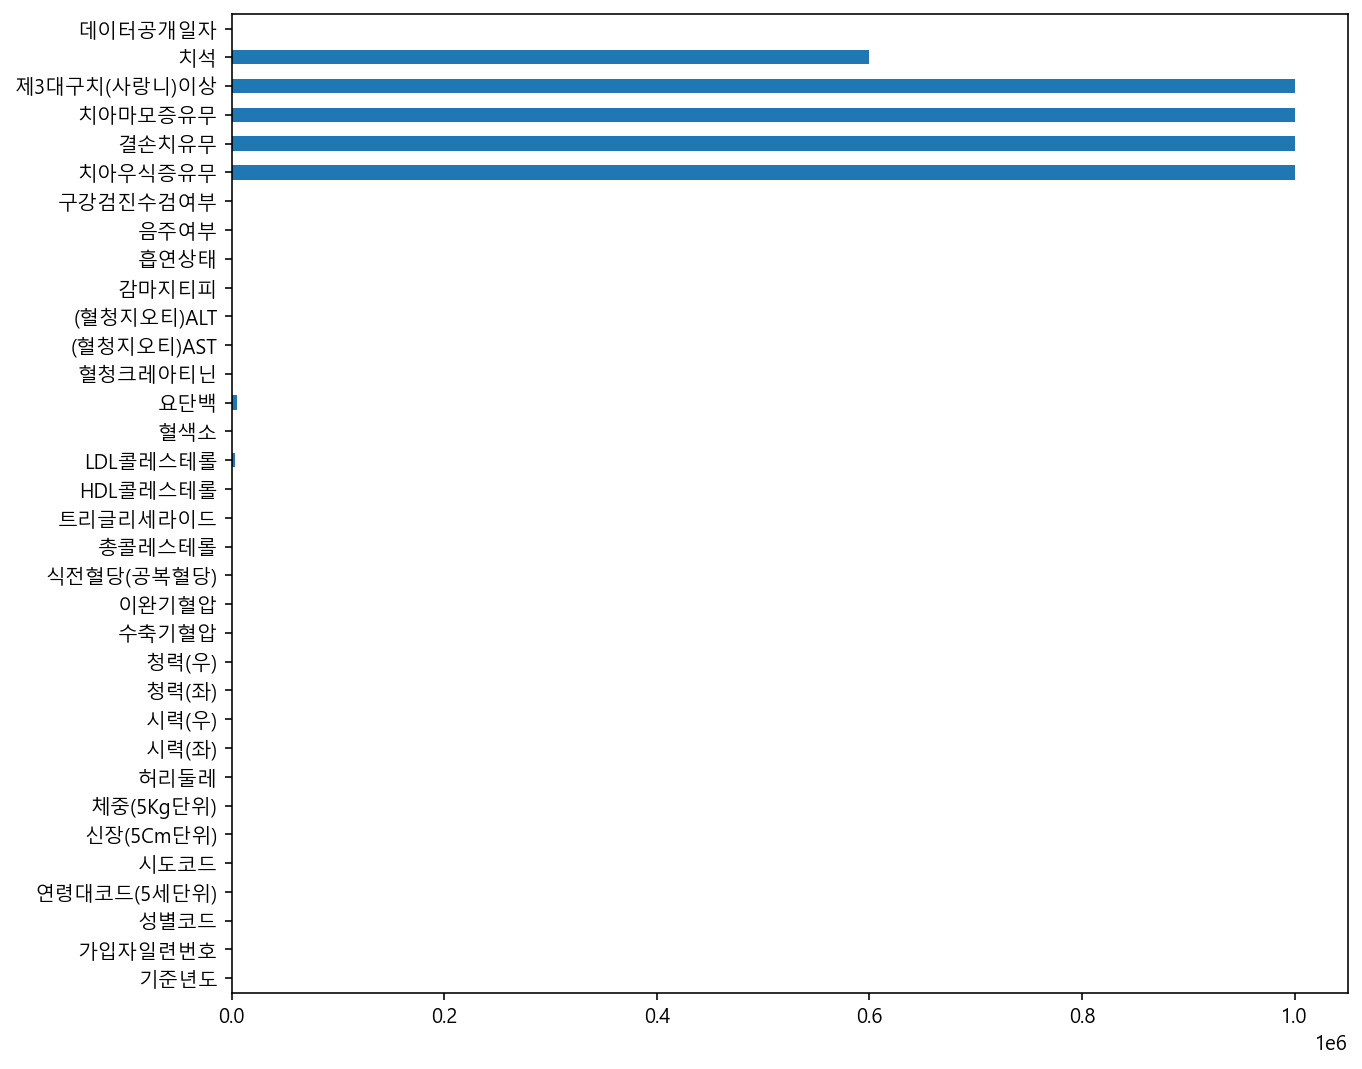

In [13]:
# 결측치 여부를 boolean 값으로 표시
# True + True + False = 2 -> sum()을 이용하여 데이터 개수를 count

df.isnull().sum().plot.barh(figsize=(10,9))

# 일부 데이터 요약하기

In [14]:
print(type(df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()))
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

<class 'pandas.core.frame.DataFrame'>


(혈청지오티)ALT  (혈청지오티)AST
0        35.0        21.0
1        36.0        20.0
2        32.0        47.0
3        34.0        29.0
4        12.0        19.0

In [15]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999958 non-null  float64
 1   (혈청지오티)AST  999959 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [16]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999958.000000  999959.000000
mean       25.749509      25.994671
std        26.294770      23.587469
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        29.000000      28.000000
max      7210.000000    9999.000000

# value_counts()로 데이터 집계하기

In [17]:
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [18]:
df["흡연상태"].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

# groupby와 pivot_table 사용하기
* 성능은 대부분 비슷하다
* groupby가 조금 더 빠르지만, pivot_table이 사용하기 조금 더 직관적이다

## groupby

In [19]:
# groupby로 데이터를 그룹화하여 분석

df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [20]:
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     173612
      1.0     356587
2     0.0     326827
      1.0     142438
Name: 가입자일련번호, dtype: int64

In [21]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.739868
      1.0     56.610981
2     0.0     22.612408
      1.0     25.001018
Name: 감마지티피, dtype: float64

In [22]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [23]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(
    ["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   173604  34.739868    25.0
     1.0   356576  56.610981    37.0
2    0.0   326813  22.612408    17.0
     1.0   142429  25.001018    17.0

## pivot_table

In [24]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

가입자일련번호
음주여부         
0.0    500439
1.0    499025

In [25]:
# groupby로 하나의 column을 선택하면 series 데이터가 return된다
# pivot_table은 하나의 column이라도 dataframe 데이터가 return된다

df.pivot_table(index="성별코드", values="가입자일련번호", aggfunc="count")

가입자일련번호
성별코드         
1      530410
2      469590

In [26]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

mean median
          감마지티피  감마지티피
음주여부                  
0.0   26.819650   19.0
1.0   47.588675   30.0

In [27]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부                                                              
0.0   14.0  19.0  29.0  500417.0  999.0  26.819650  1.0  30.639714
1.0   18.0  30.0  52.0  499005.0  999.0  47.588675  1.0  63.056912

In [28]:
pd.pivot_table(df, index=["음주여부", "성별코드"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부 성별코드                                                              
0.0  1     18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     2     13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
1.0  1     24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
     2     13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

# 전체 데이터 시각화 하기
* 양이 많은 데이터를 시각화할 때는 되도록이면 groupby, pivot_table로 연산을 한 후 시각화하는 것이 빠름
* seaborn과 같은 고급 통걔 연산을 하는 그래프는 비교적 느리다

## 히스토그램 (도수분포표)
* 수치 데이터가 많을 경우 히스토그램을 사용하면 좋다

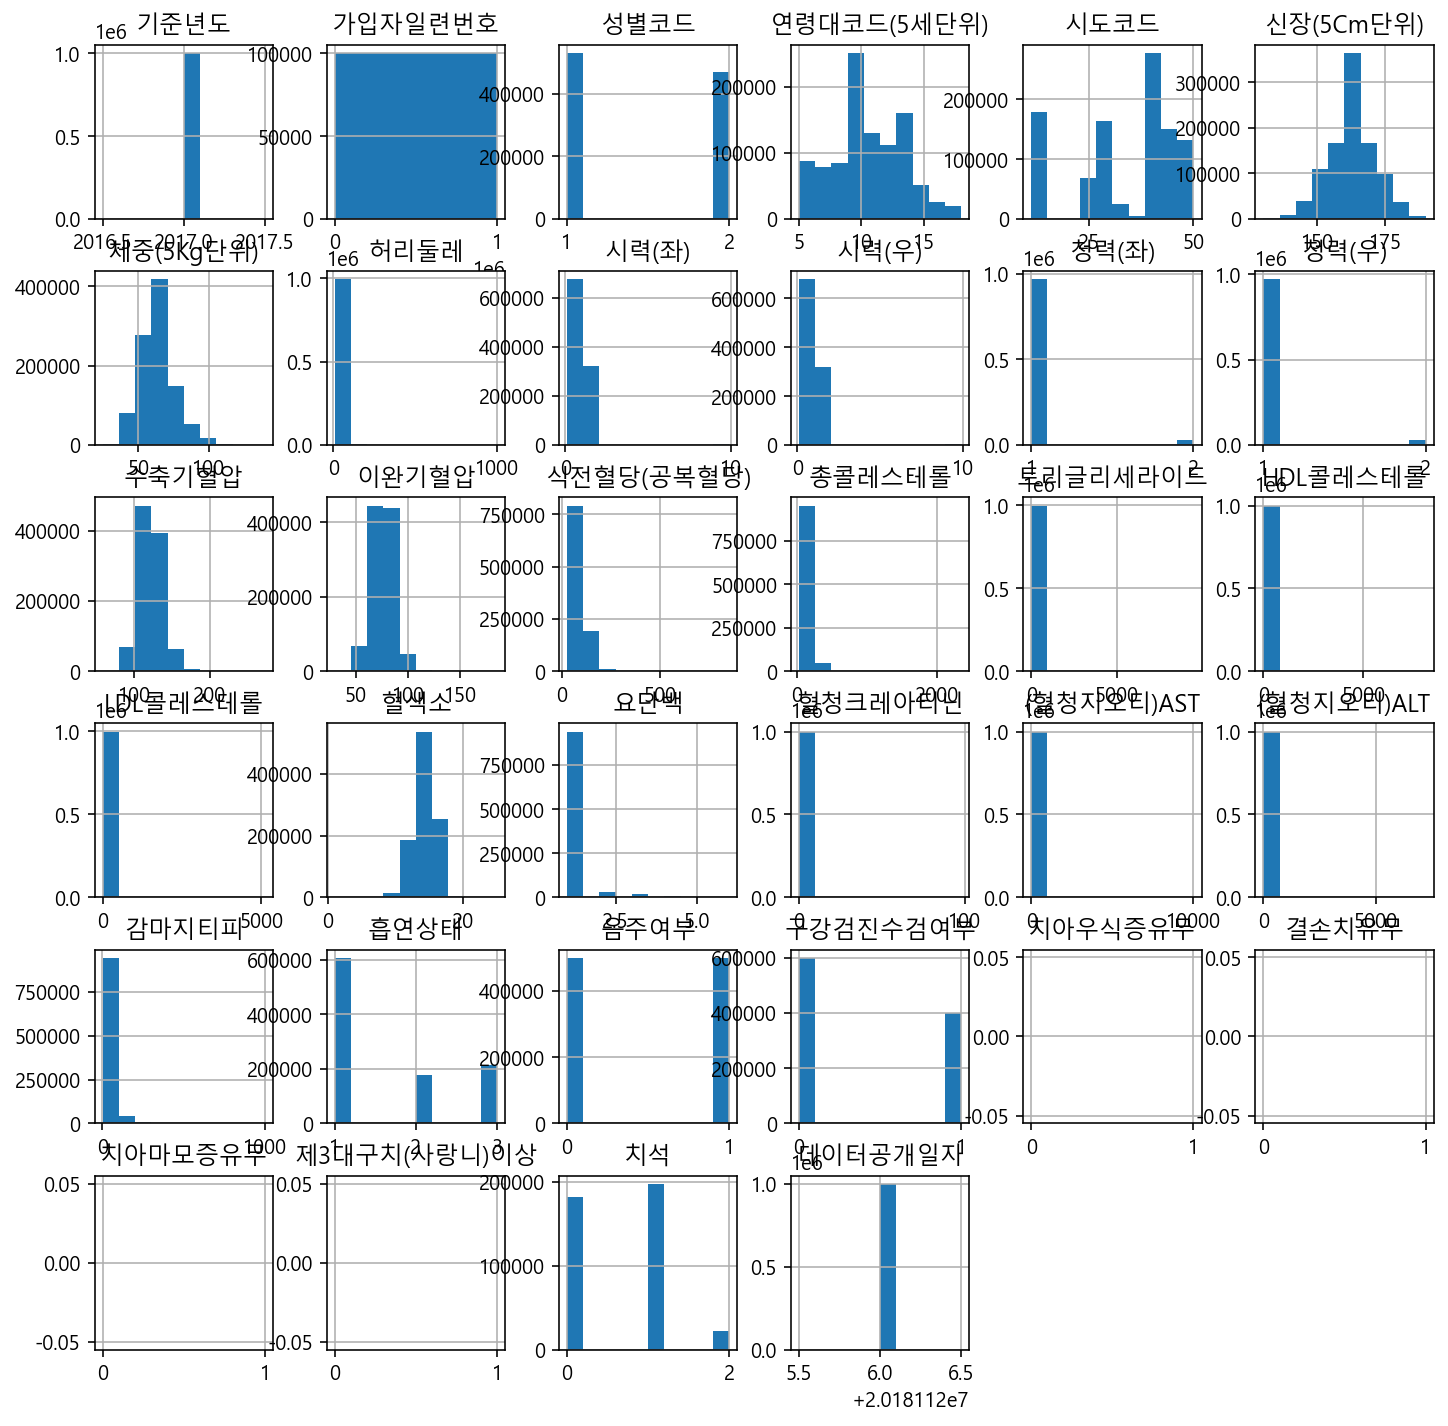

In [29]:
h = df.hist(figsize=(12,12))

## 슬라이싱을 사용해 히스토그램 그리기

array([[<AxesSubplot:title={'center':'기준년도'}>,
        <AxesSubplot:title={'center':'가입자일련번호'}>,
        <AxesSubplot:title={'center':'성별코드'}>],
       [<AxesSubplot:title={'center':'연령대코드(5세단위)'}>,
        <AxesSubplot:title={'center':'시도코드'}>,
        <AxesSubplot:title={'center':'신장(5Cm단위)'}>],
       [<AxesSubplot:title={'center':'체중(5Kg단위)'}>,
        <AxesSubplot:title={'center':'허리둘레'}>,
        <AxesSubplot:title={'center':'시력(좌)'}>],
       [<AxesSubplot:title={'center':'시력(우)'}>,
        <AxesSubplot:title={'center':'청력(좌)'}>,
        <AxesSubplot:title={'center':'청력(우)'}>]], dtype=object)

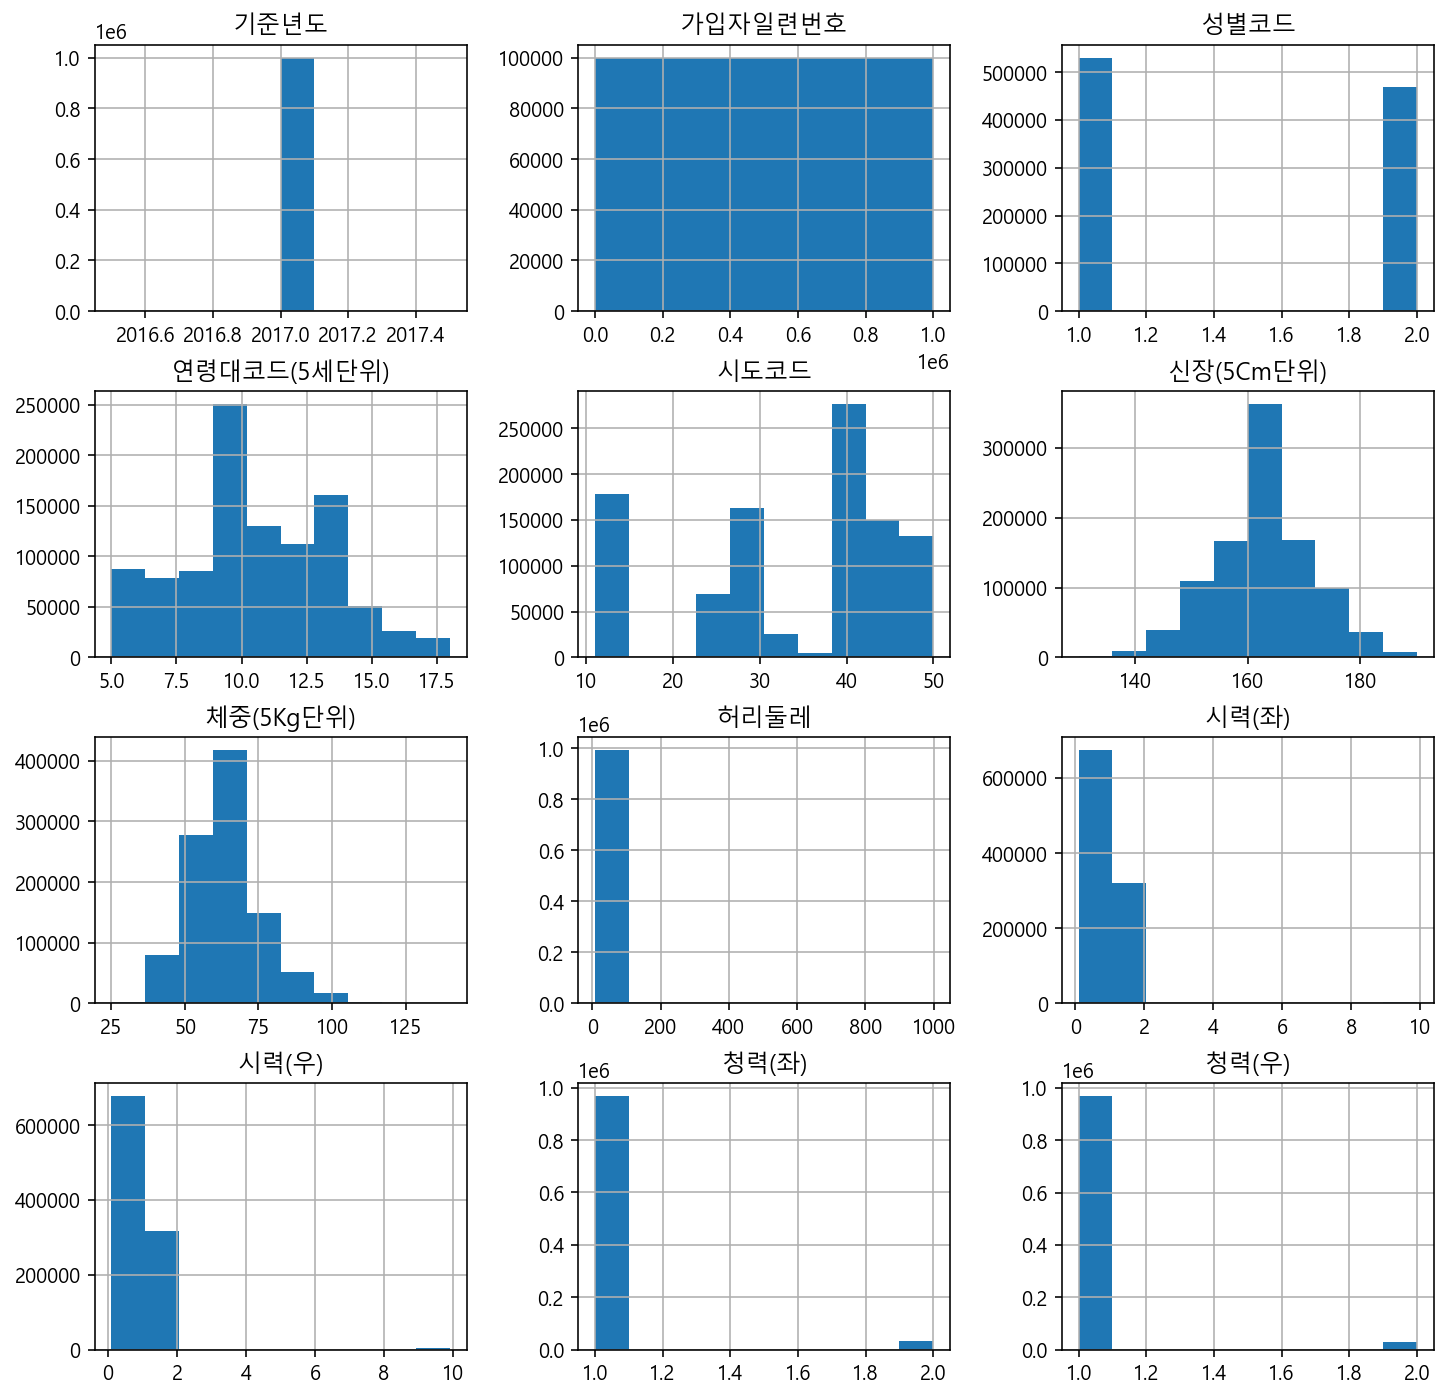

In [30]:
# loc : label 이름 기반의 2차원 indexing
# iloc : 행렬 index값 기반의 2차원 indexing

df.iloc[:, :12].hist(figsize=(12,12))

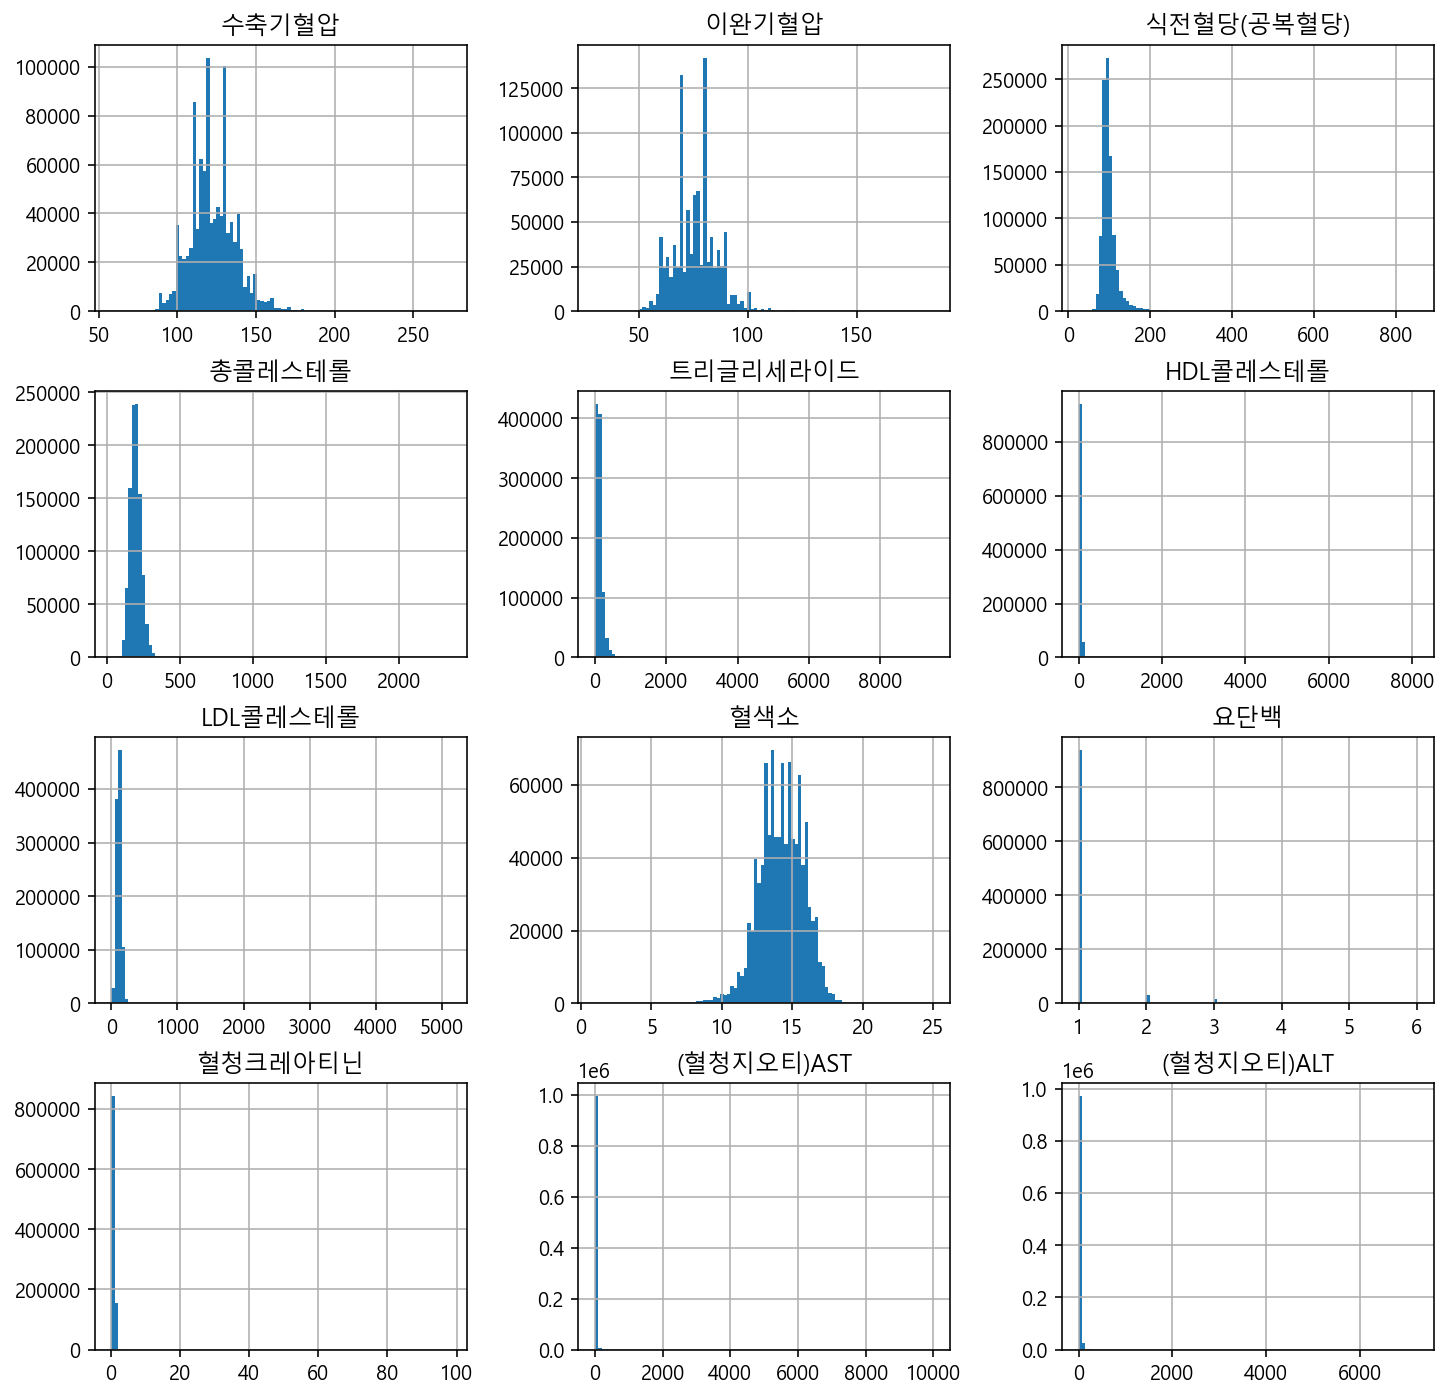

In [31]:
# iloc[row, column]
# 12~24번째 colum의 데이터를 히스토그램으로 그리기
# bins 옵션 : 구간 막대 개수, default = 10

h = df.iloc[:, 12:24].hist(figsize=(12,12), bins=100)

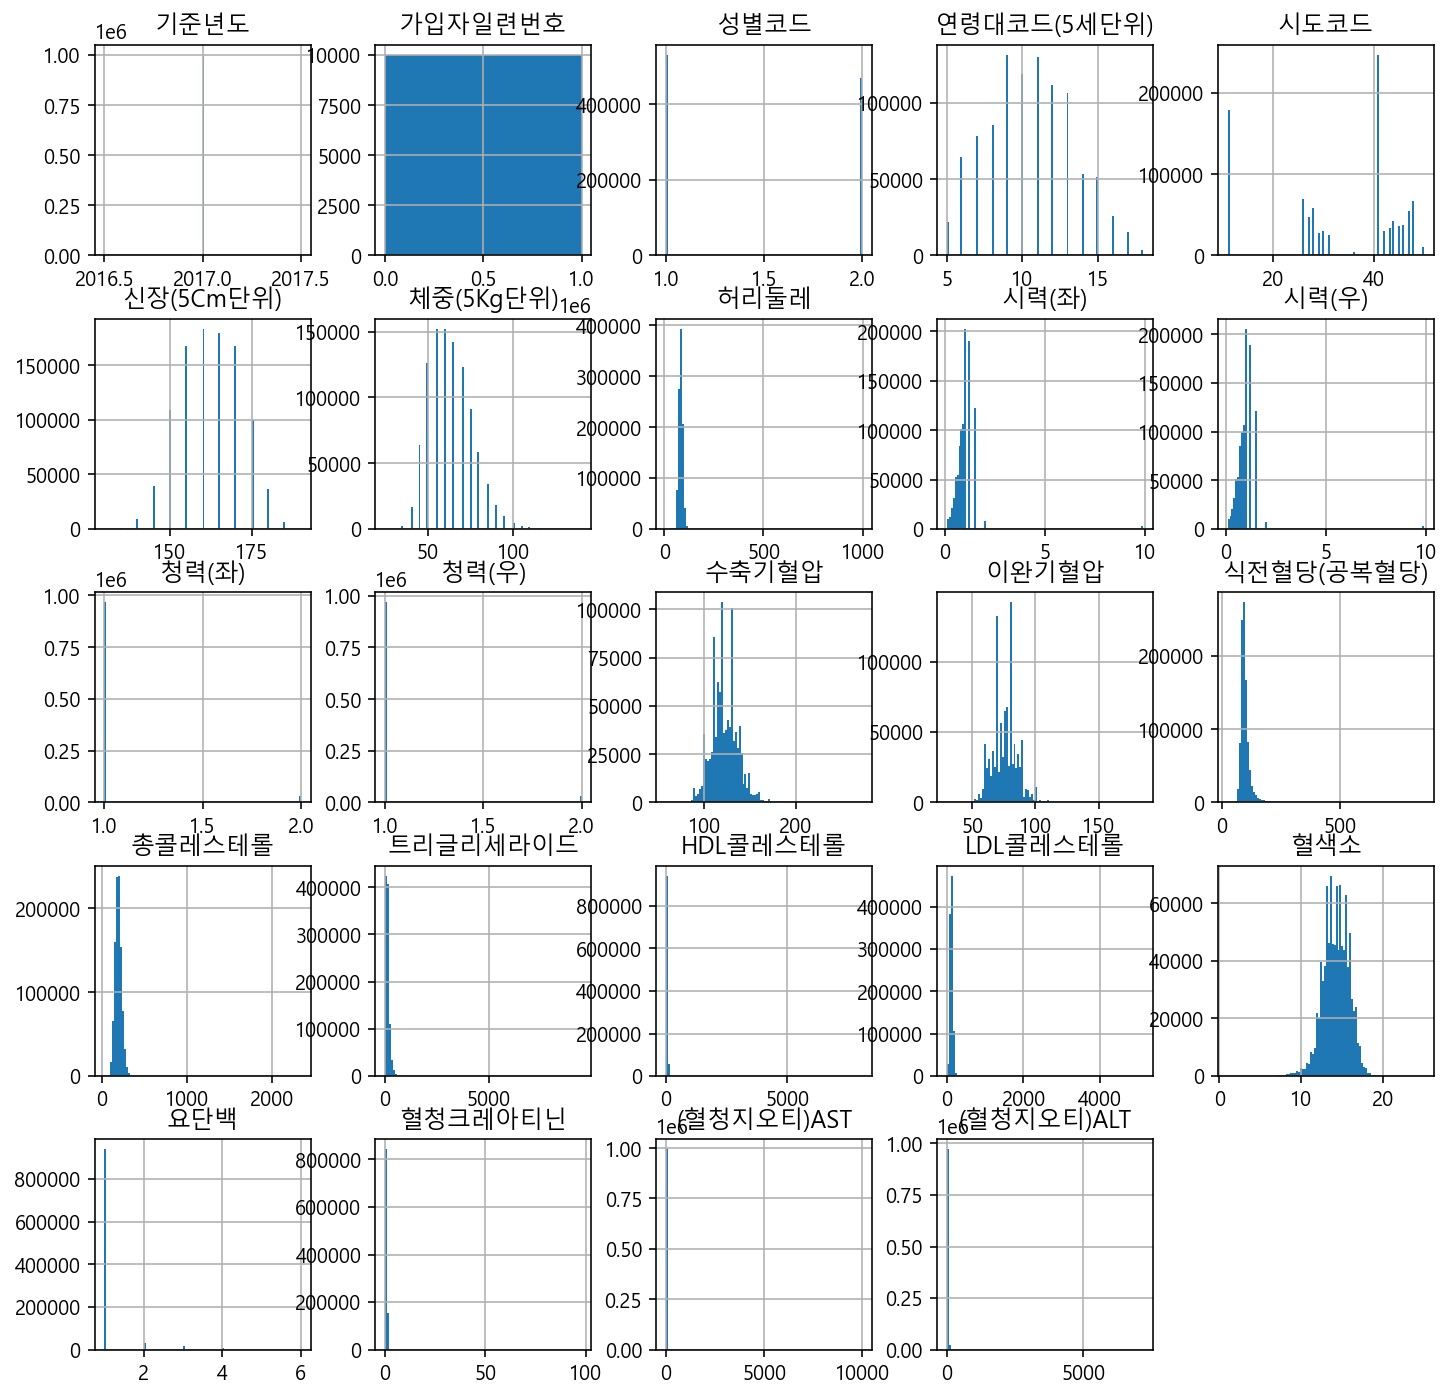

In [32]:
h = df.iloc[:, :24].hist(figsize=(12,12), bins=100)

# 샘플데이터 추출하기

# 데이터 시각화 도구 Seaborn 사용하기

In [33]:
# random_state값은 random값을 계산하는데 쓰이는 계수, 일정하게 설정하면 같은 샘플값이 도출된다

df_sample = df.sample(1000, random_state=1)
df.sample(1000).shape

(1000, 34)

# 범주형(카테고리) 데이터 시각화

## count_plot - 음주여부

<AxesSubplot:>

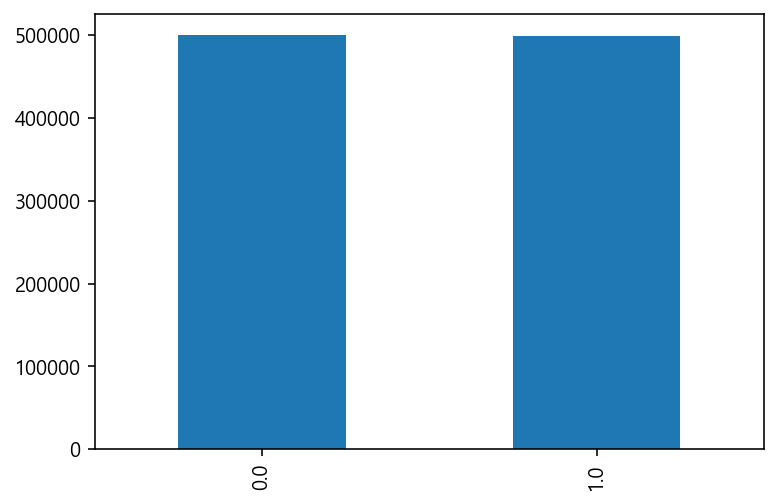

In [34]:
df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

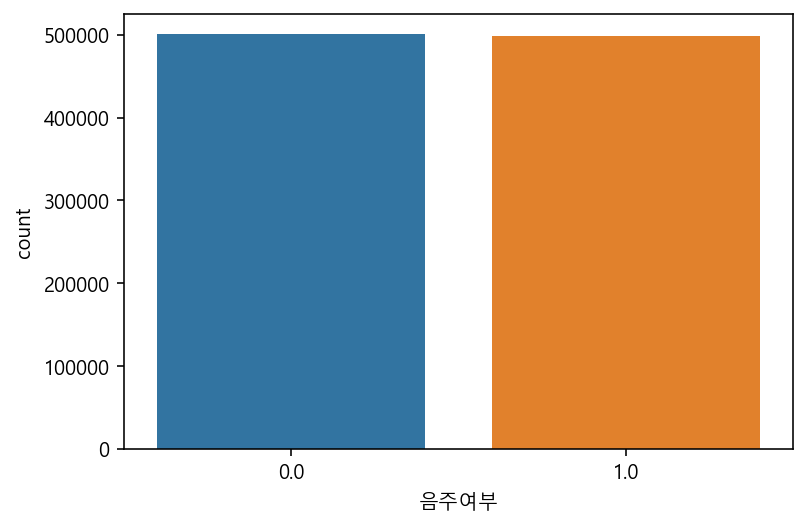

In [35]:
sns.countplot(x="음주여부", data=df)

## hue 옵션 사용하기

<AxesSubplot:xlabel='음주여부', ylabel='count'>

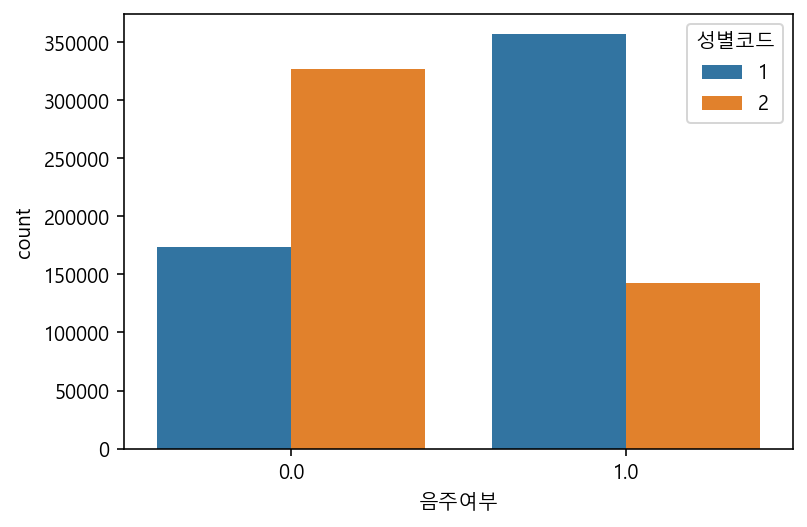

In [36]:
# hue : 다른 카테고리에 다른 색상을 입히는 옵션

sns.countplot(data=df, x="음주여부", hue="성별코드")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

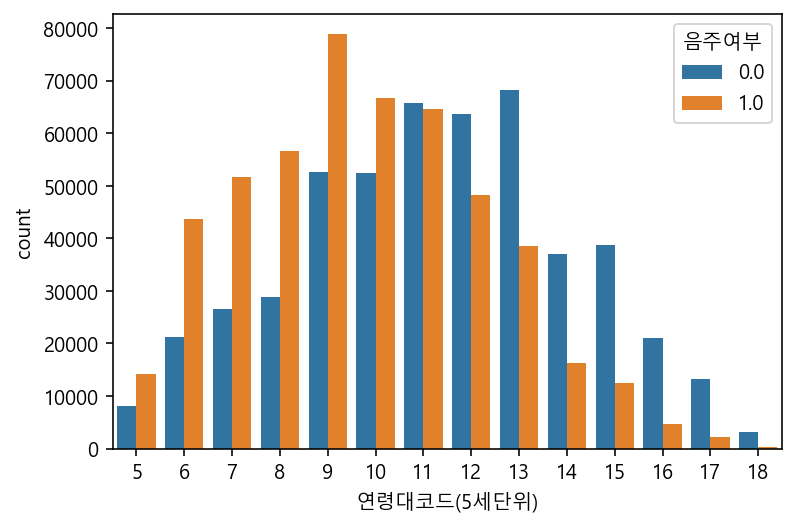

In [37]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

## count_plot - 키와 몸무게

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

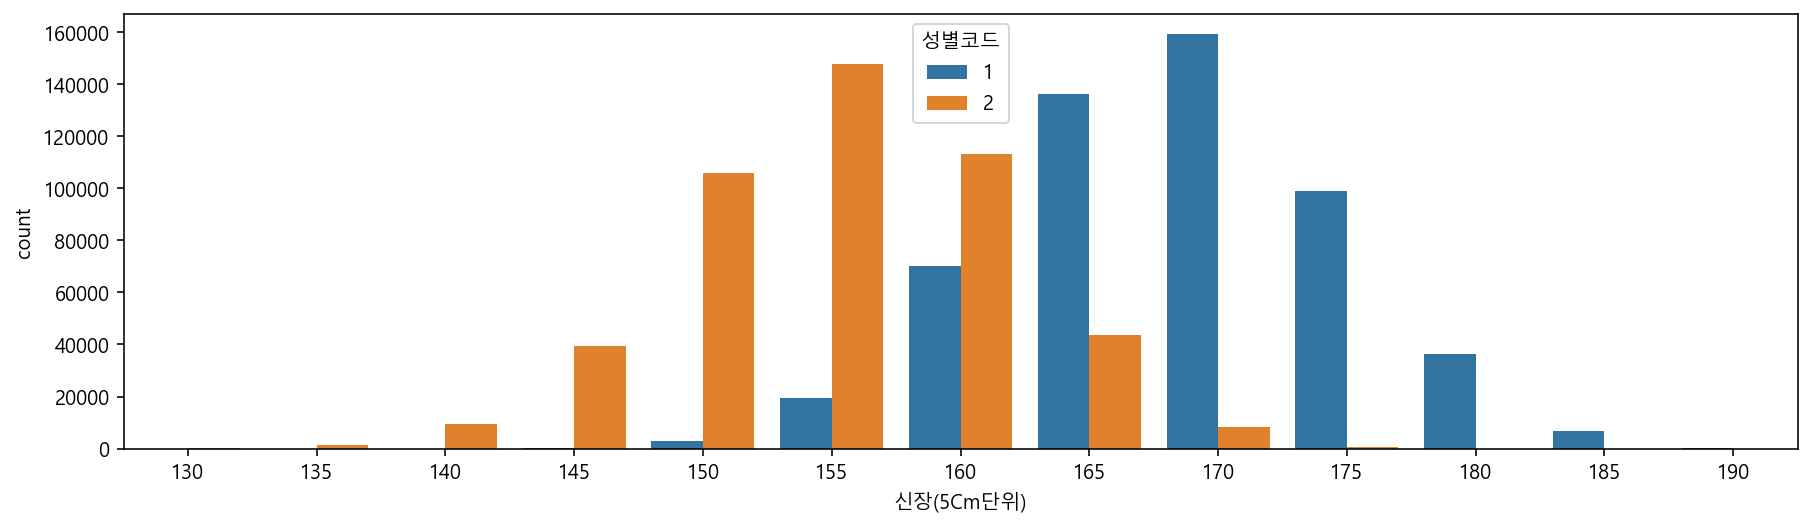

In [38]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

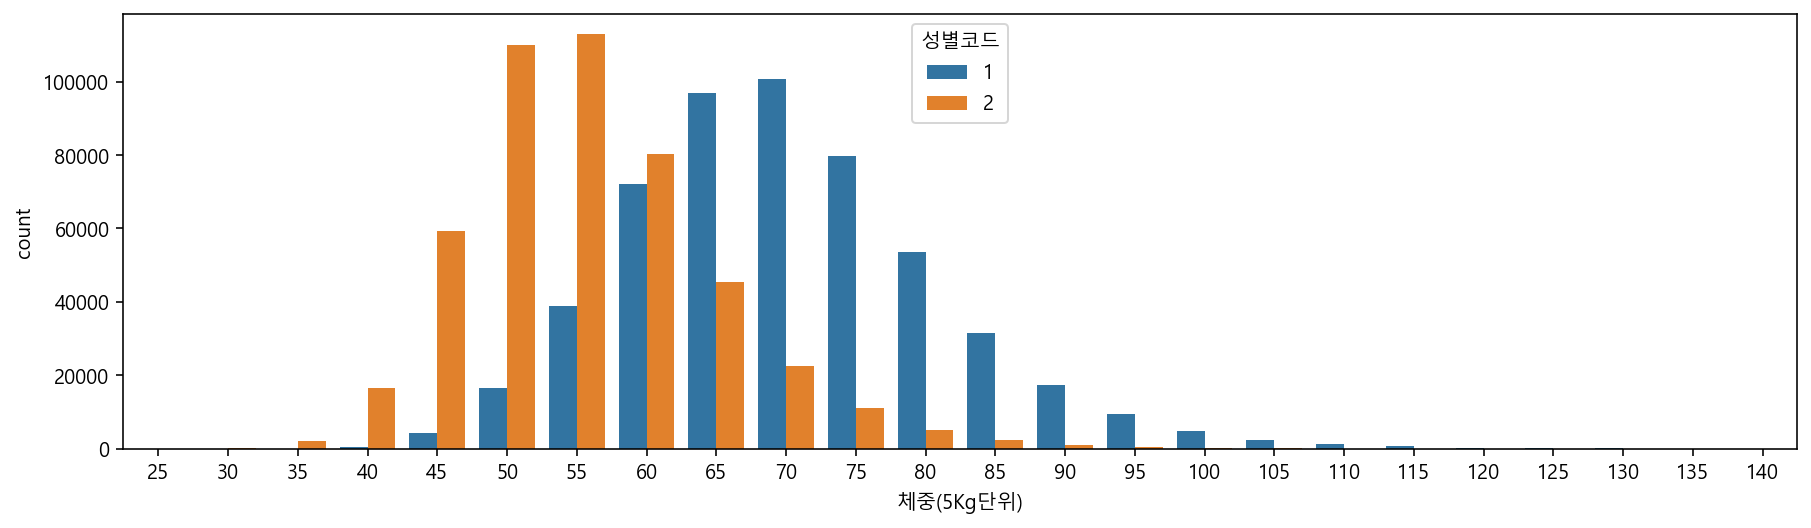

In [39]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

## barplot -  수치형 vs 범주형

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

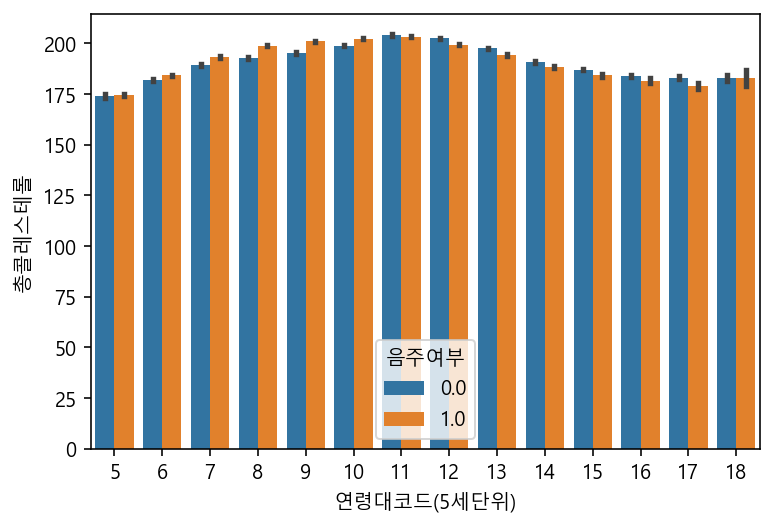

In [40]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

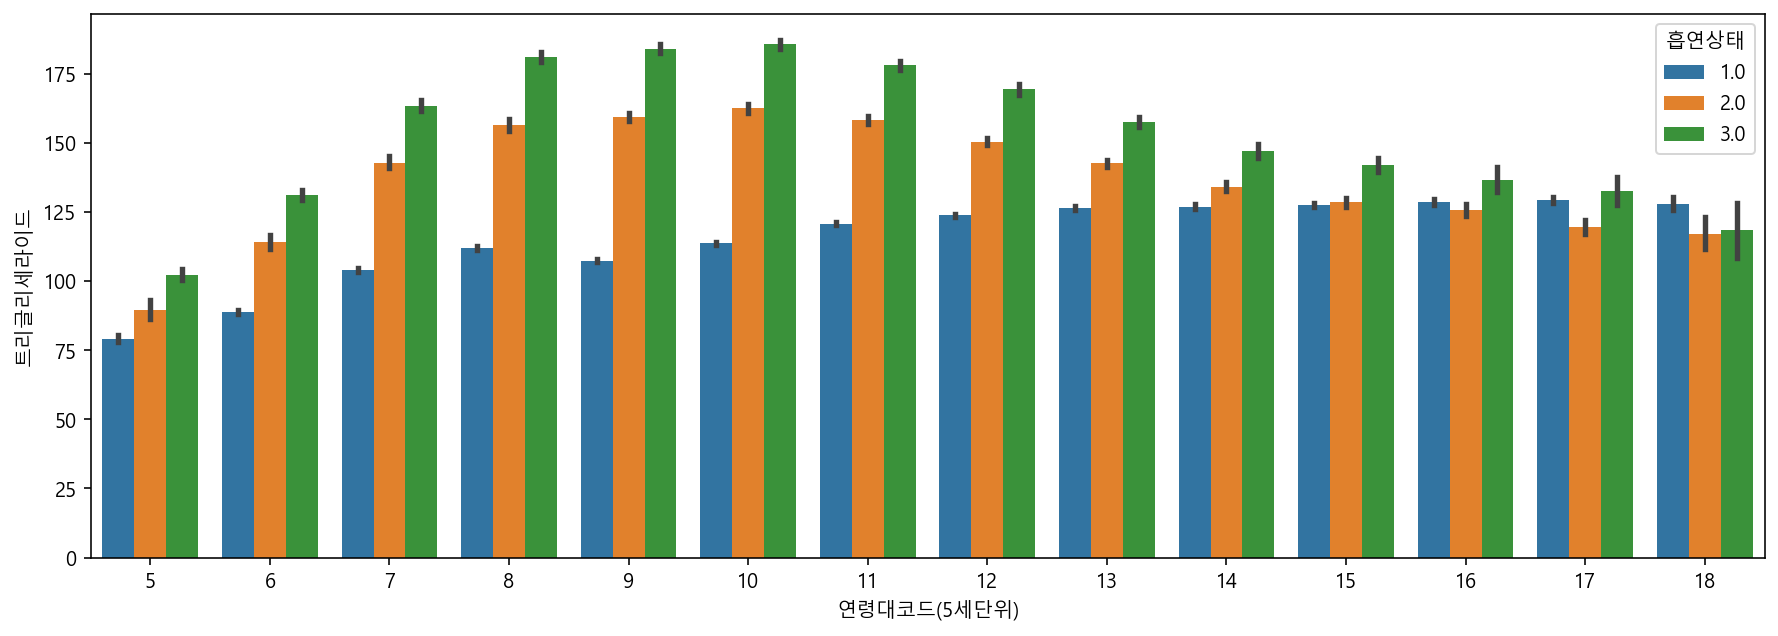

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="흡연상태")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

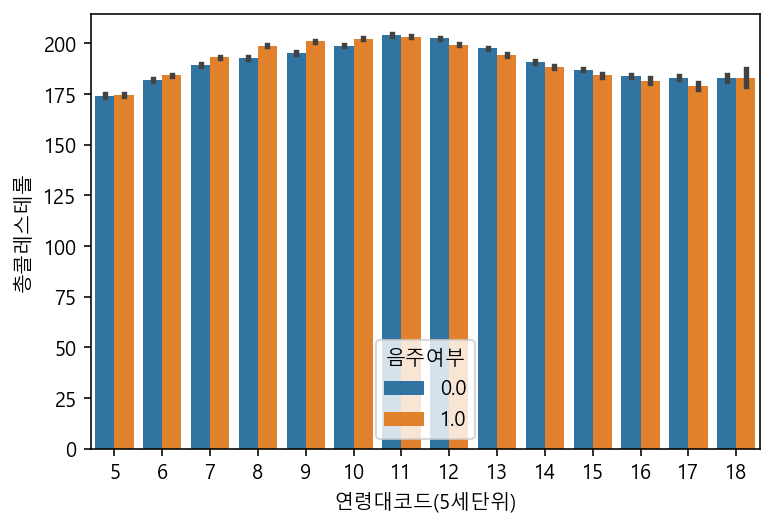

In [42]:
# ci = "sd" : 신뢰구간(confidence interval) = 표준편차 (standard deviation)
# ci = None을 선택하면 더 빨리 그래프를 그린다

sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

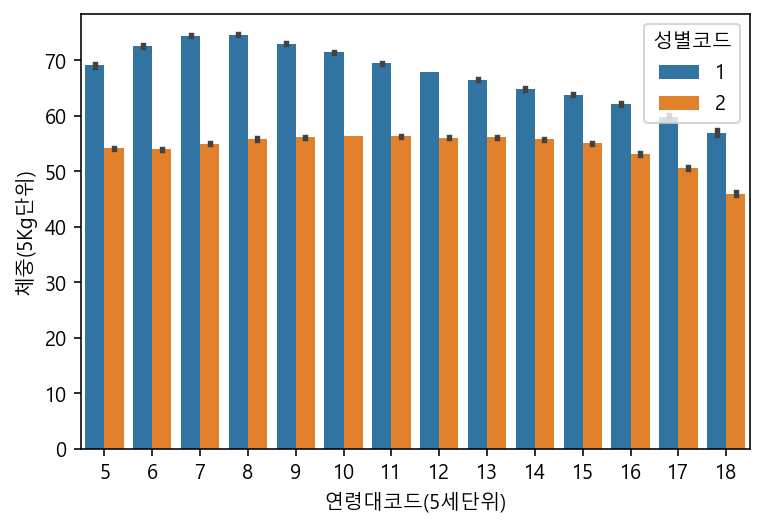

In [43]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드")

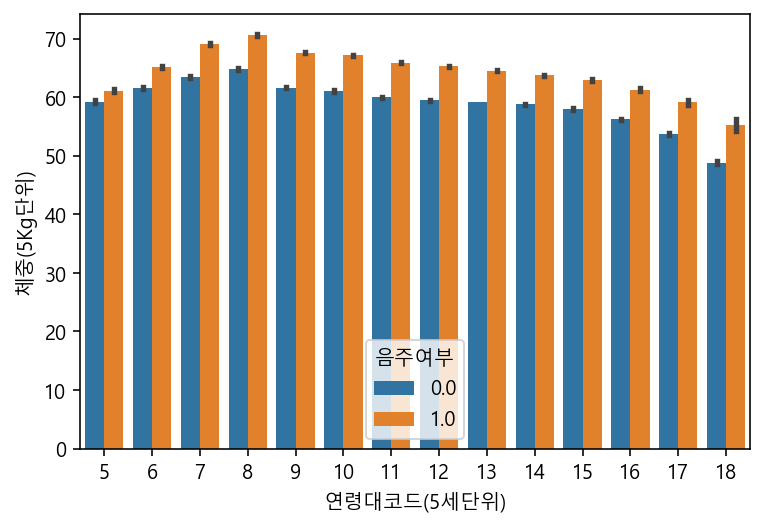

In [70]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부")

## lineplot and pointplot

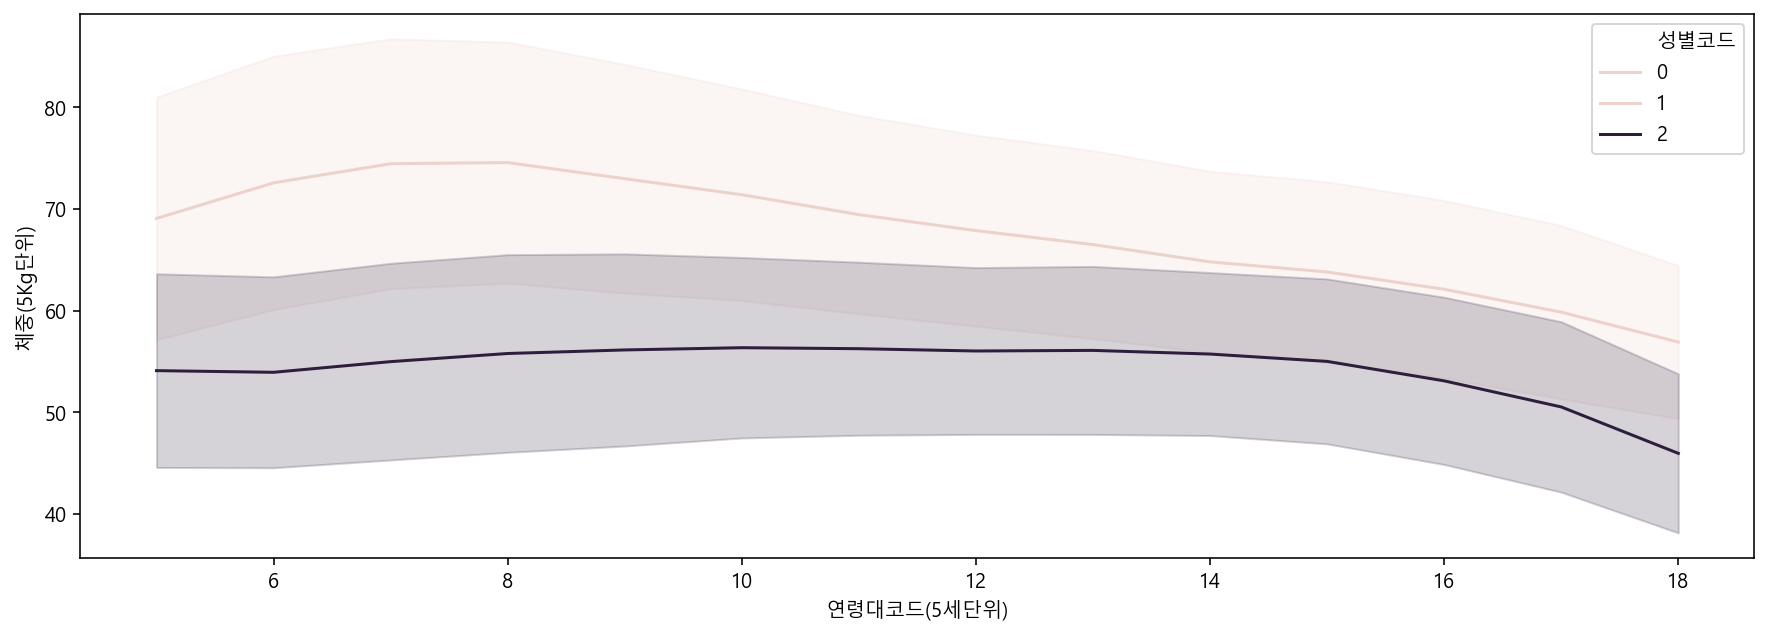

In [74]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci="sd")

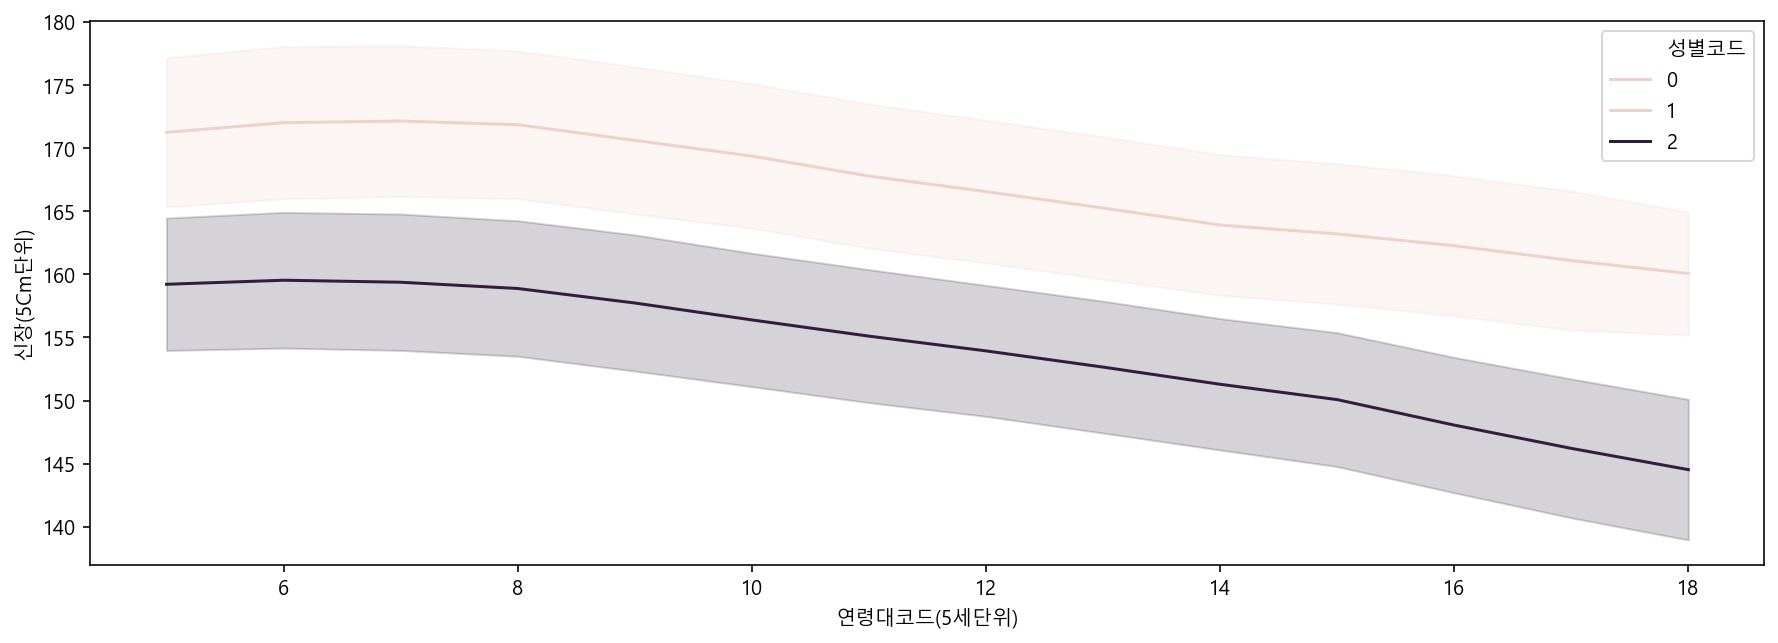

In [75]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

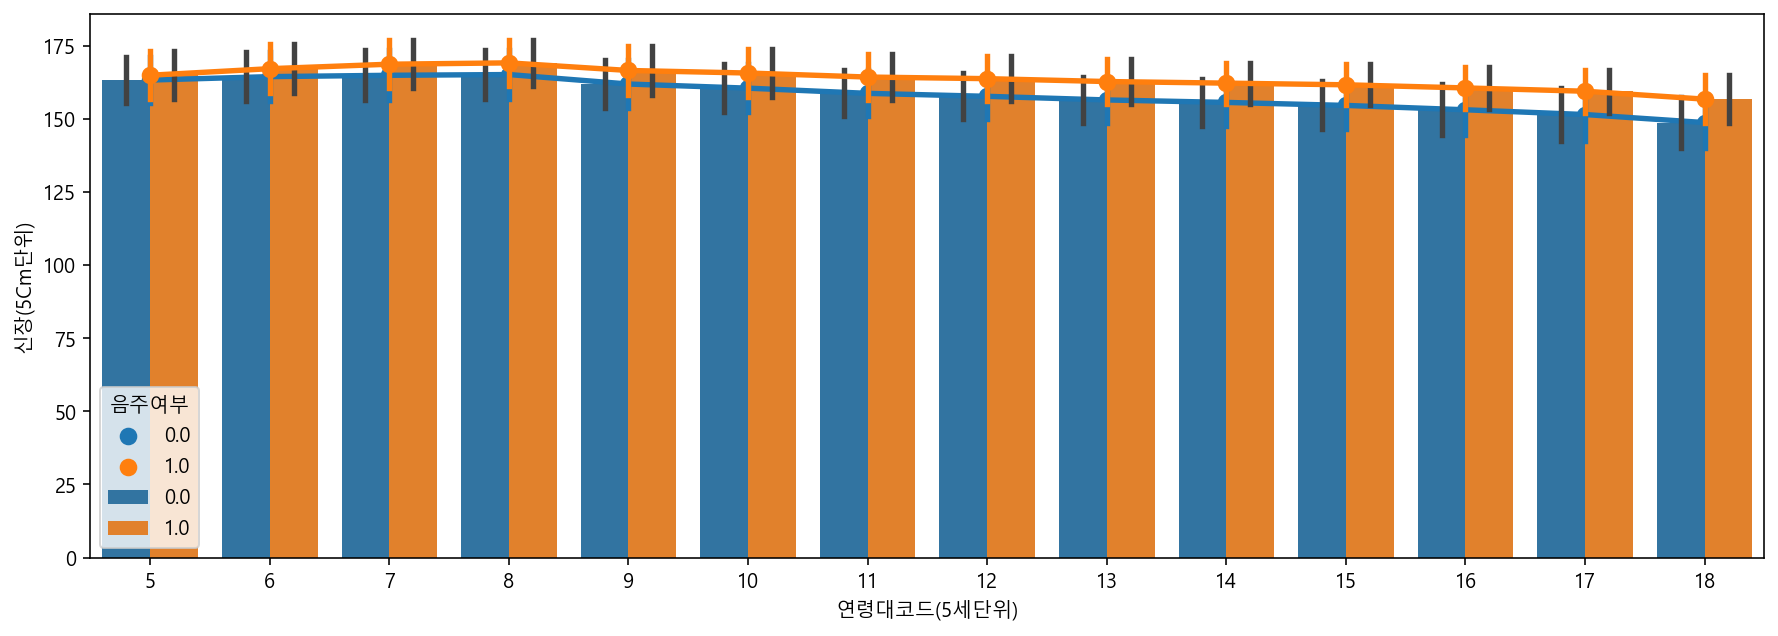

In [78]:
# barplot, pointplot 겹쳐 그리기

plt.figure(figsize=(15,5))
sns.barplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")

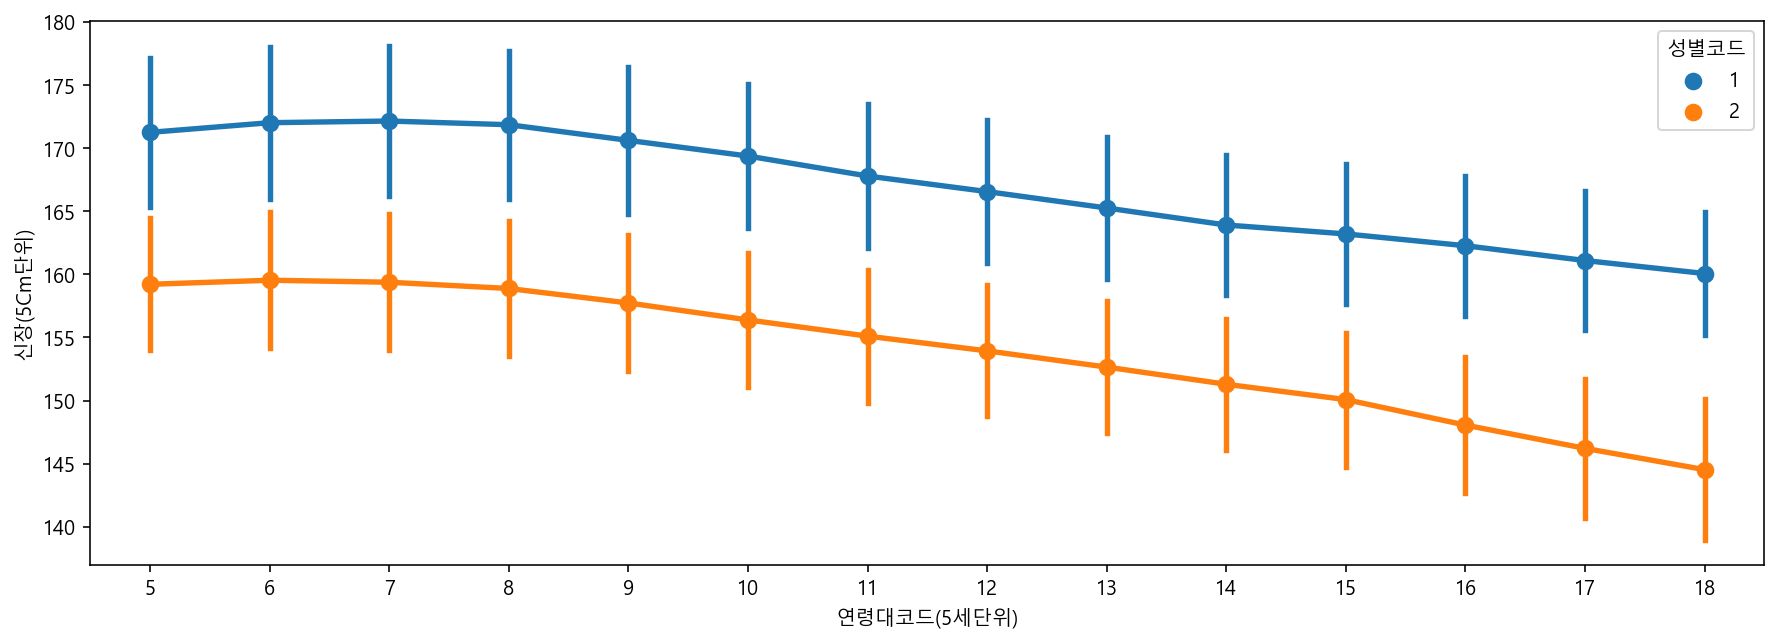

In [79]:
plt.figure(figsize=(15,5))
sns.pointplot(data=df, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

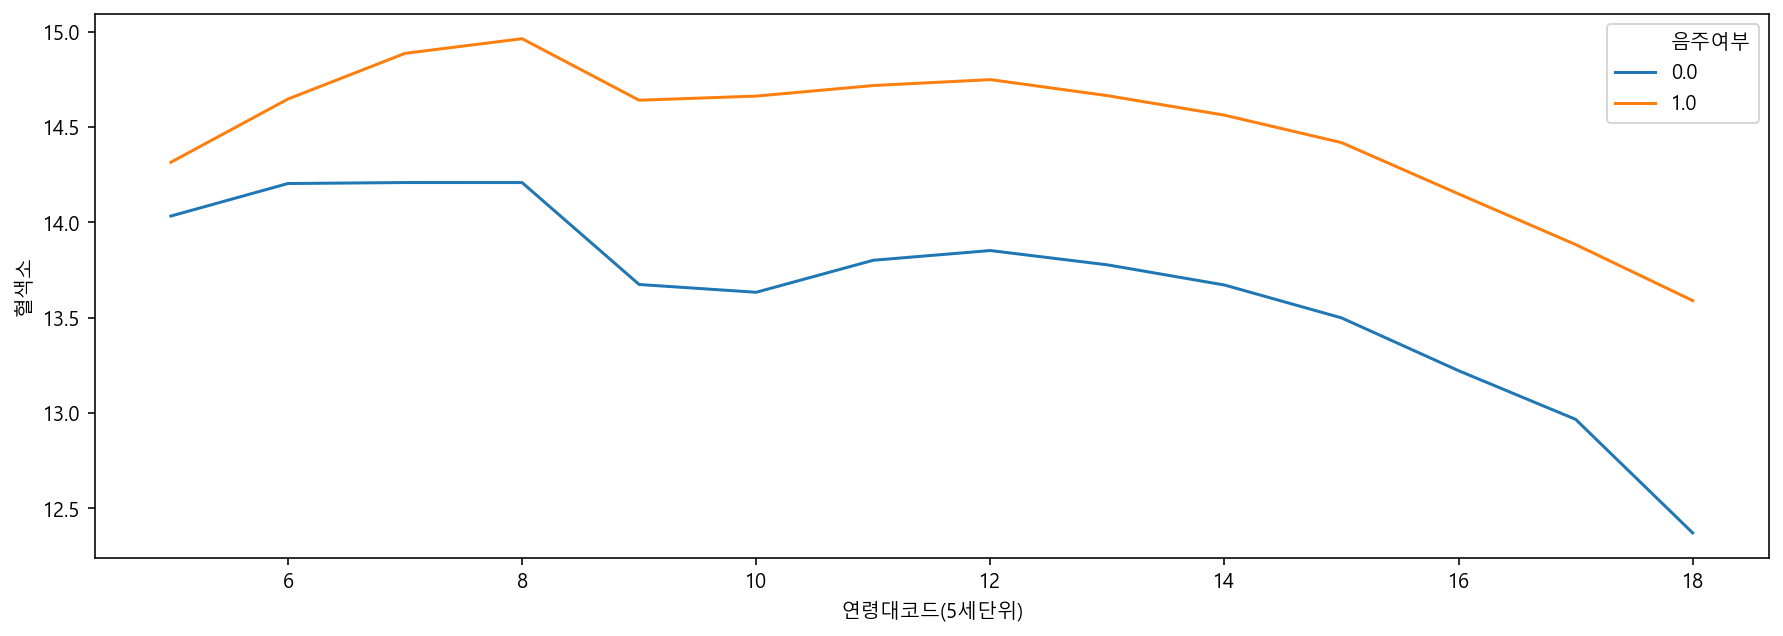

In [82]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

## boxplot
* 최소값
* 1사분위수
* 2사분위수 (중앙값)
* 3사분위수
* 최대값

사분위수 범위(IQR)은 3사분위수 - 1사분위수입니다. 
3사분위수보다 1.5 x IQR 이상을 초과하는 값과 Q1보다 1.5 x IQR 이상 미달하는 값은 이상치입니다. 

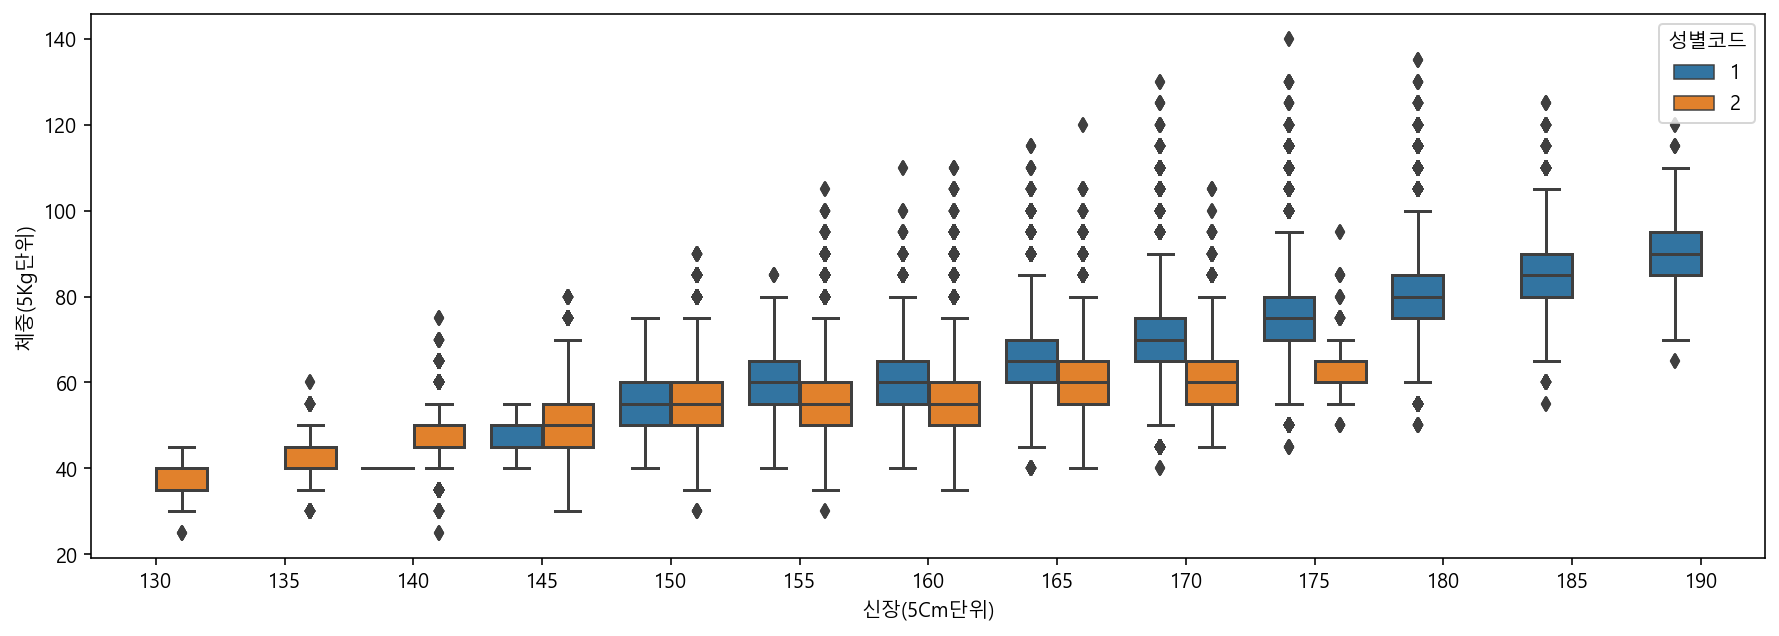

In [86]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드")

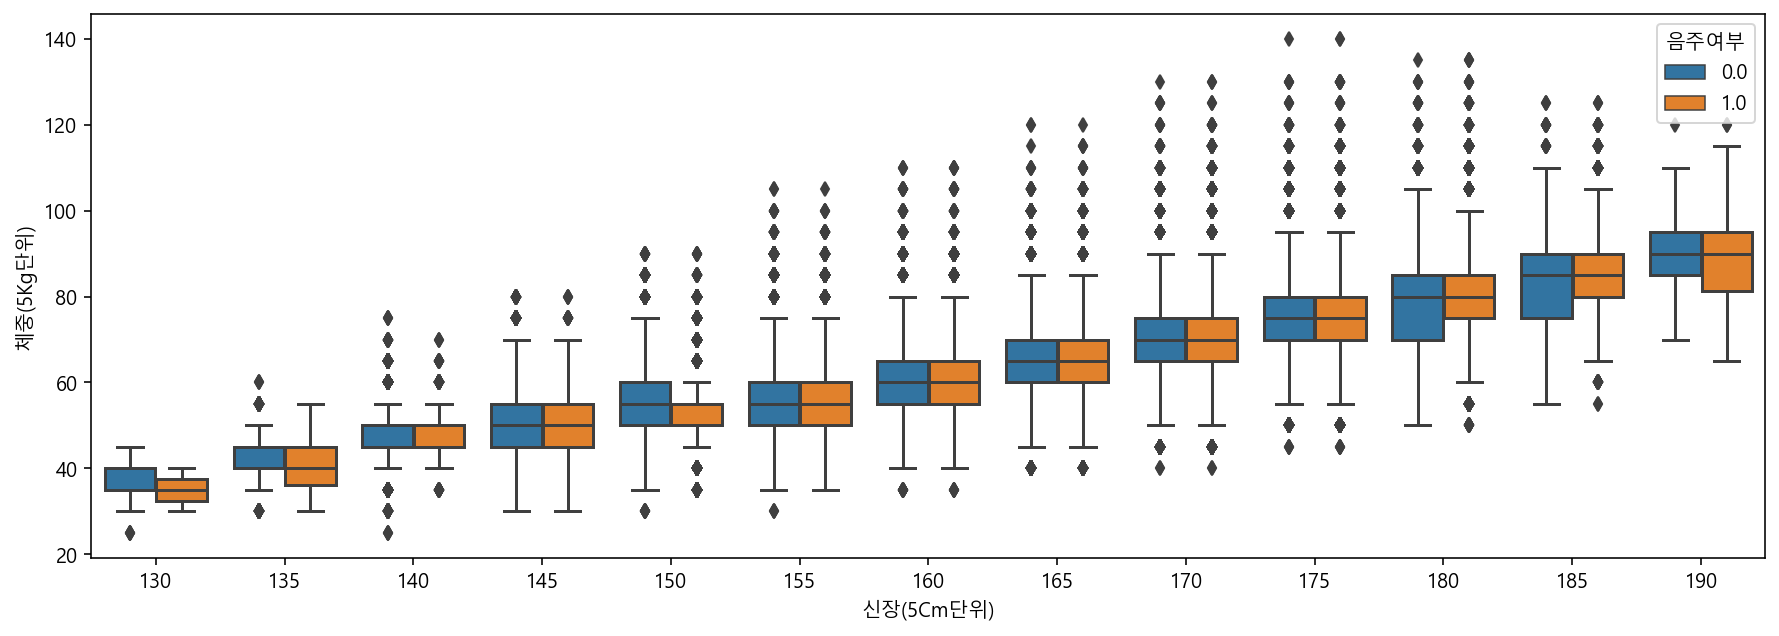

In [87]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

## violin plot

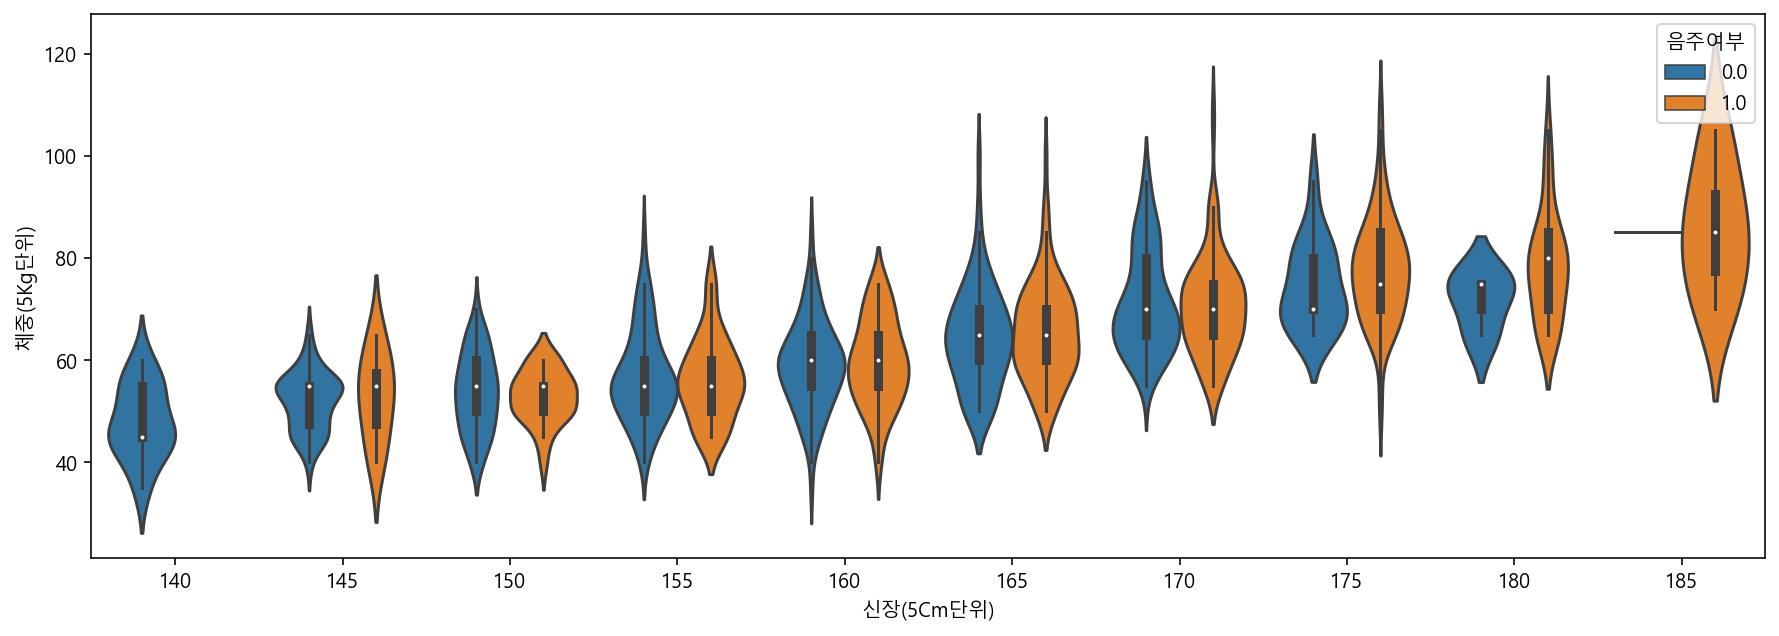

In [89]:
plt.figure(figsize=(15, 5))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

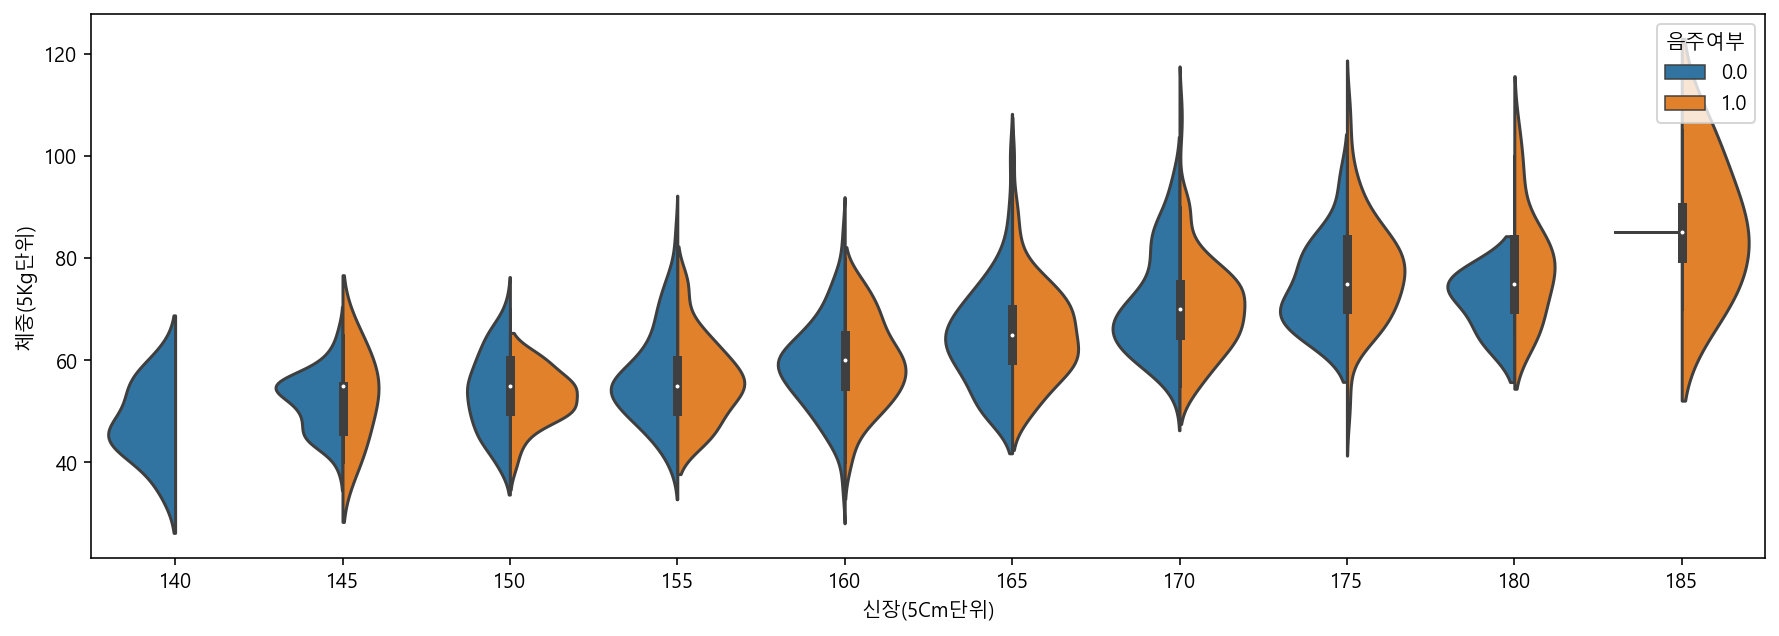

In [90]:
# split=True 옵션을 이용하면 두 개의 그래프(hue="음주여부")를 하나로 합쳐서 나타낼 수 있다

plt.figure(figsize=(15, 5))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부", split=True)

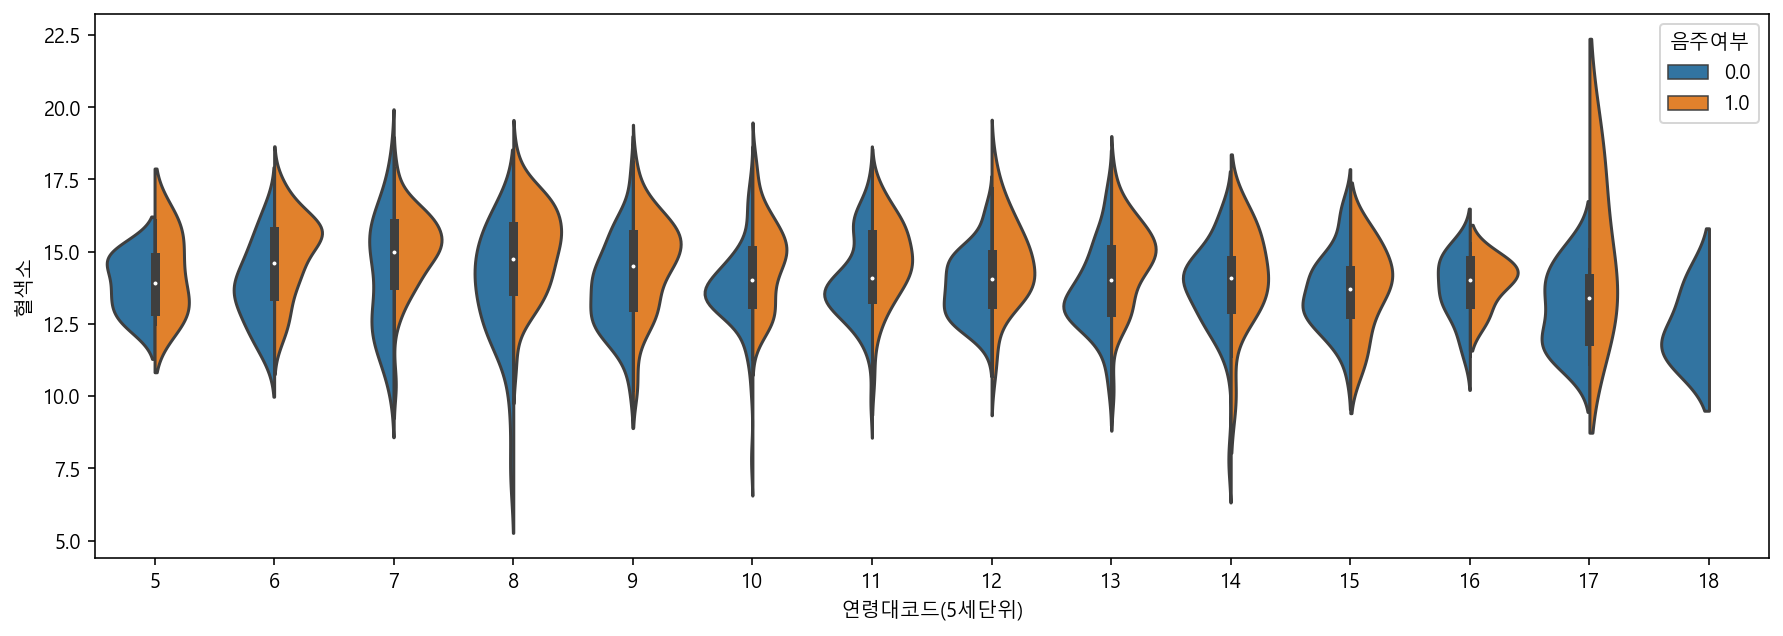

In [91]:
plt.figure(figsize=(15, 5))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)

## swarm plot

범주형 데이터를 산점도로 시각화

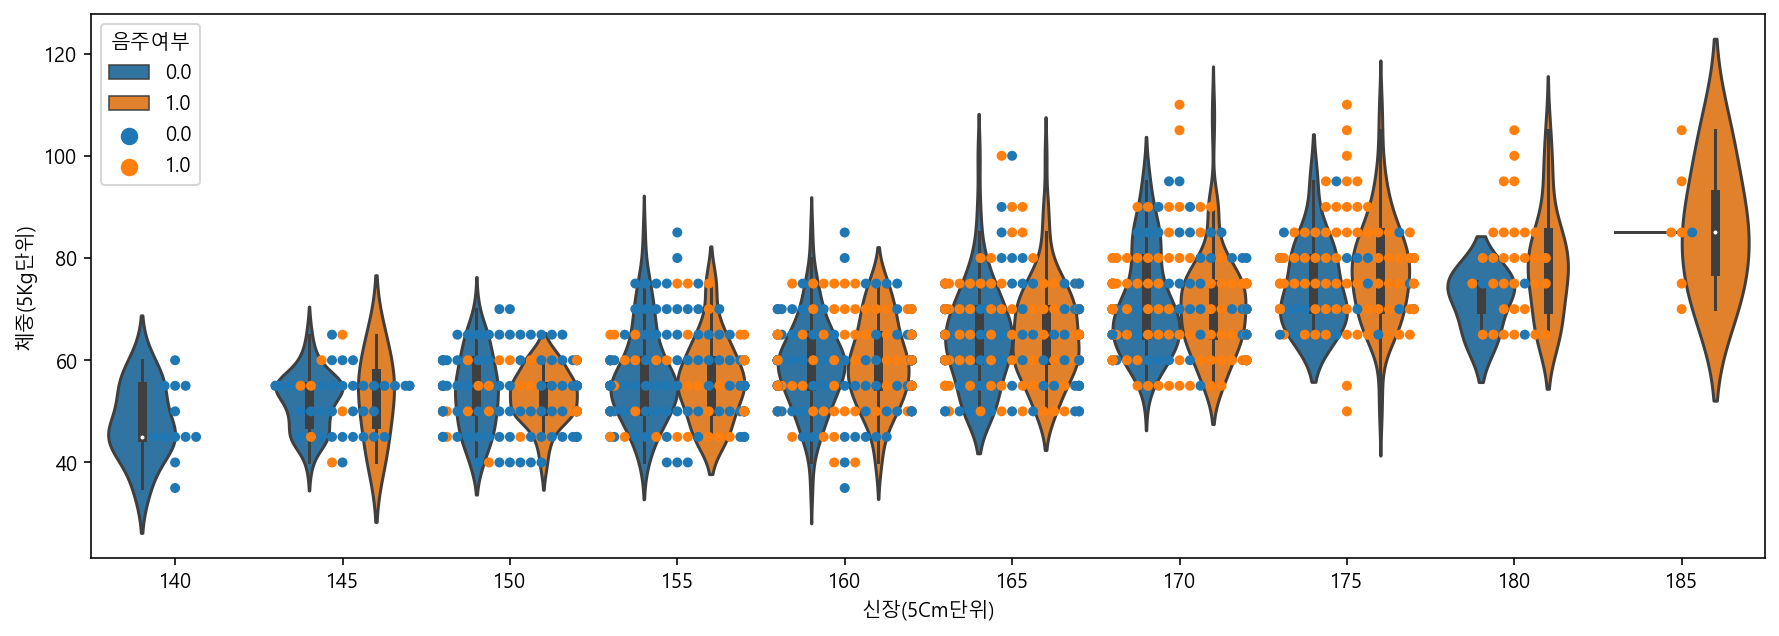

In [93]:
# violin plot과 동시에 그릴 수 있다

plt.figure(figsize=(15, 5))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")
# sns violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

C:\Users\KPKIM\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\KPKIM\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


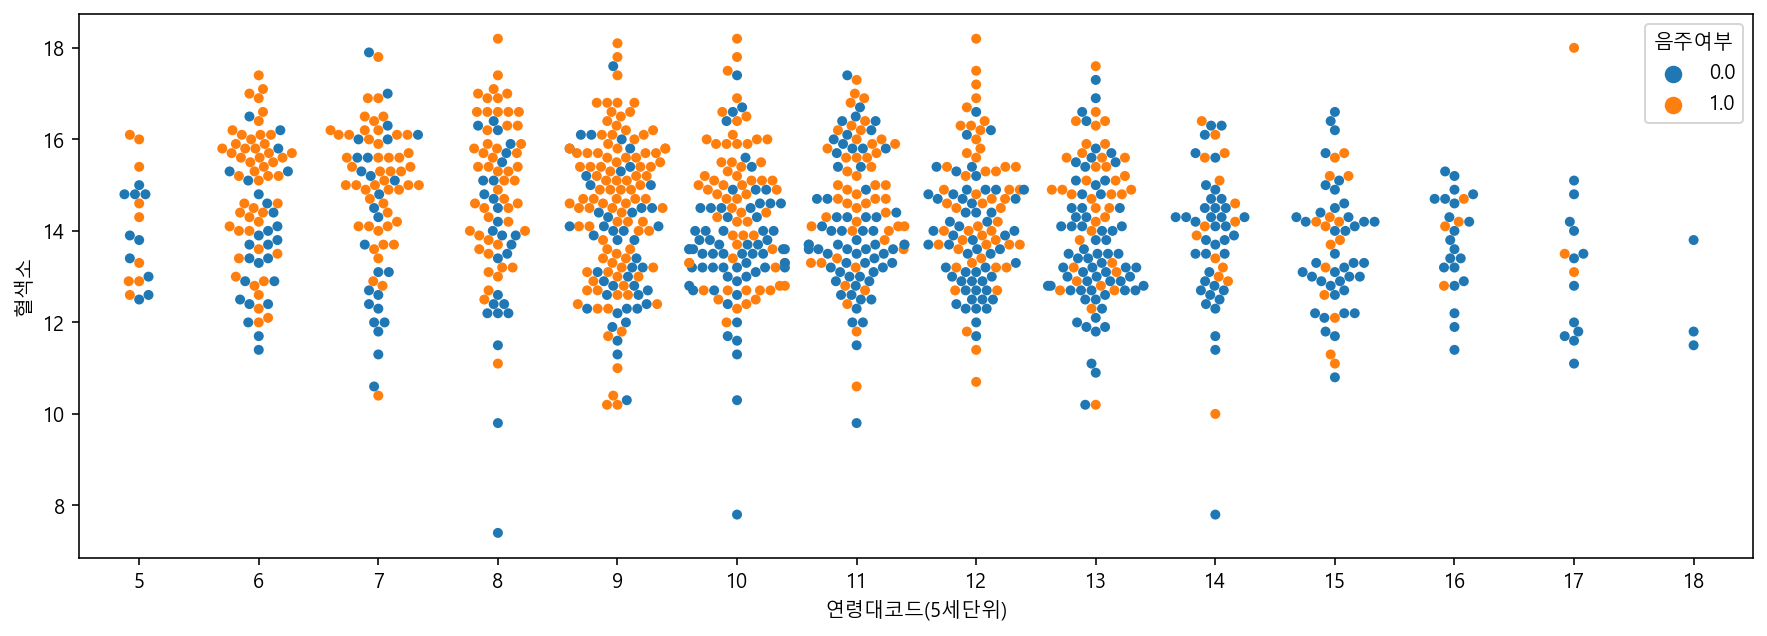

In [94]:
# swarmplot은 데이터의 분포를 산점도로 파악하기 좋다

plt.figure(figsize=(15, 5))
sns.swarmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

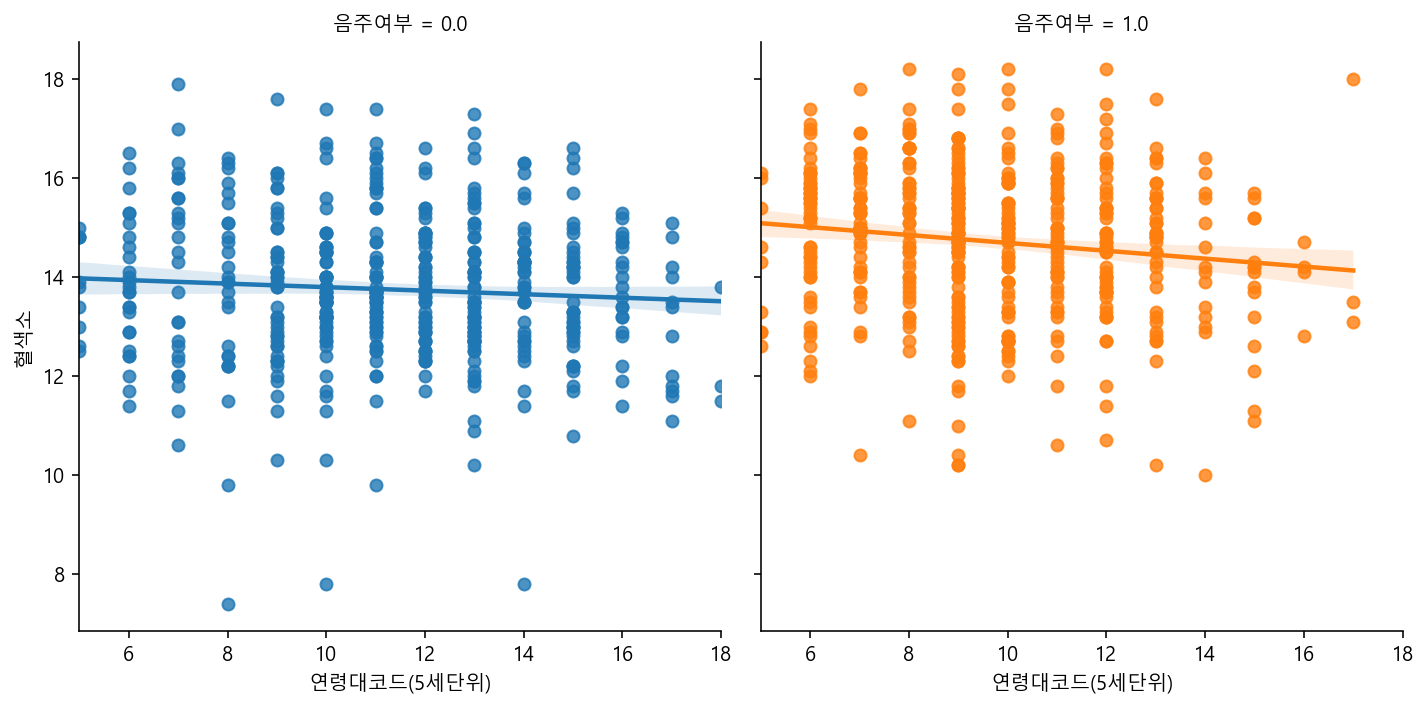

In [97]:
# lmplot은 회귀선을 표시한다, 다변수 표시에 유리하다

sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="음주여부")

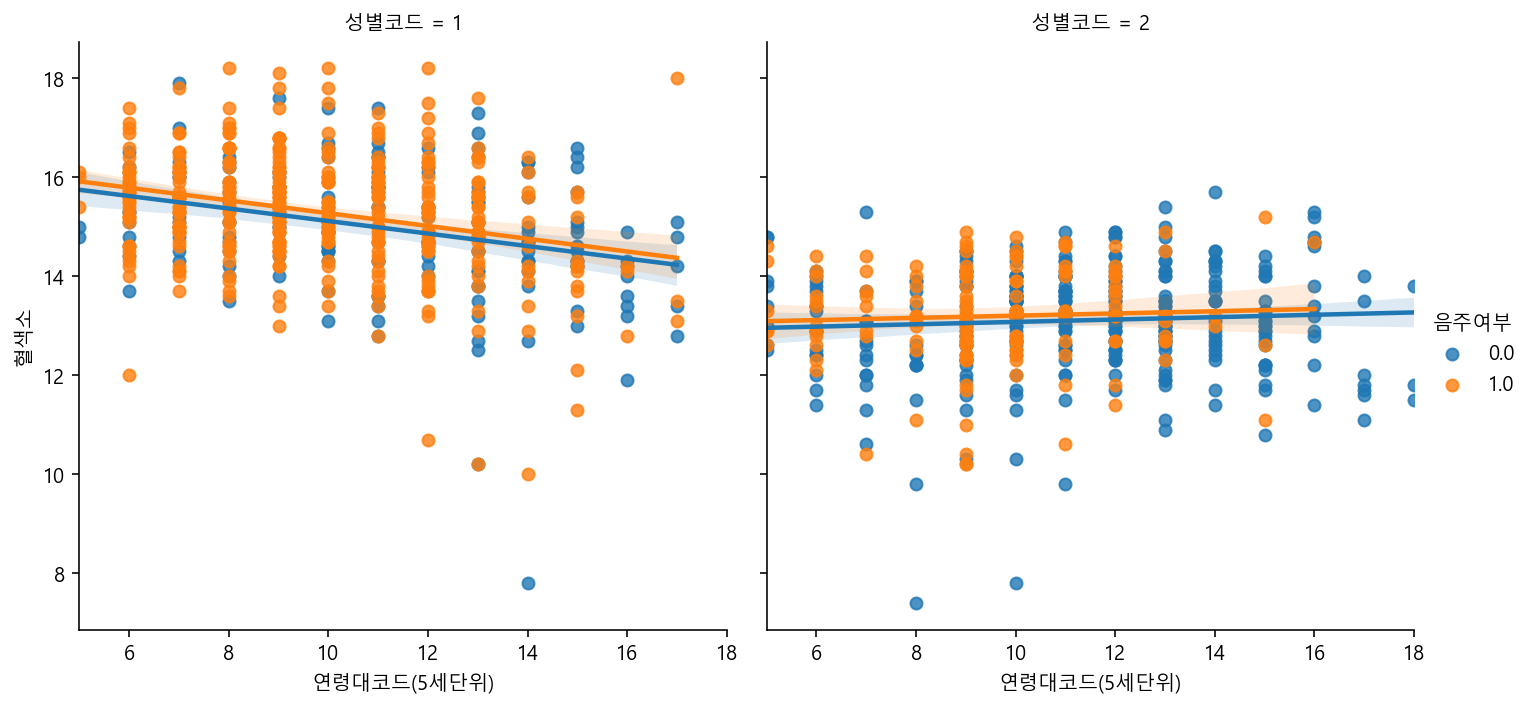

In [98]:
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")

# 수치형 데이터 시각화

## scatterplot - 산점도

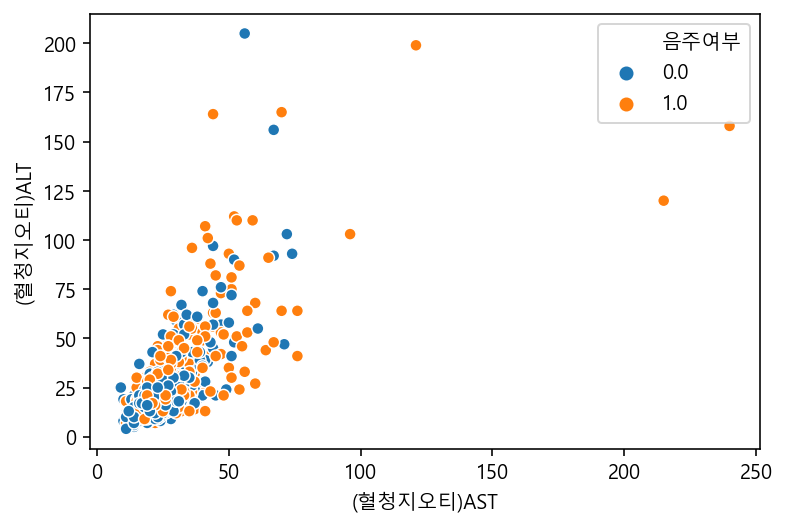

In [101]:
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부")

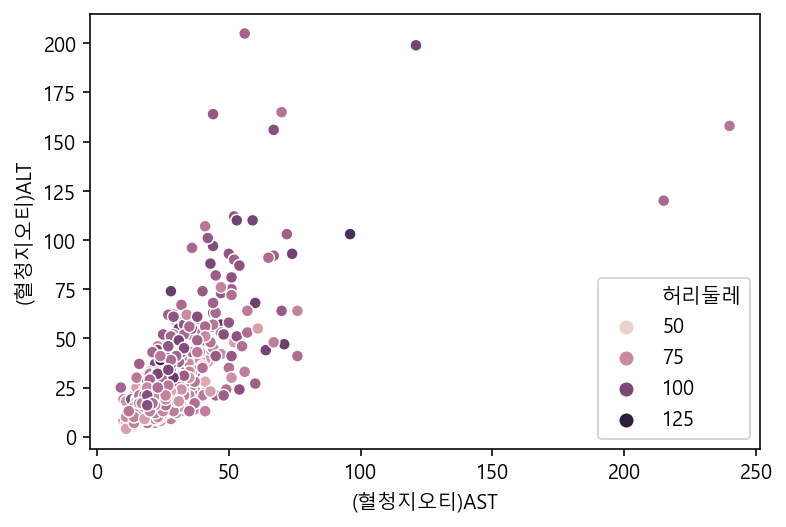

In [102]:
# scatterplot의 hue 옵션에서 연속적인 값을 지정할 수도 있다

sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="허리둘레")

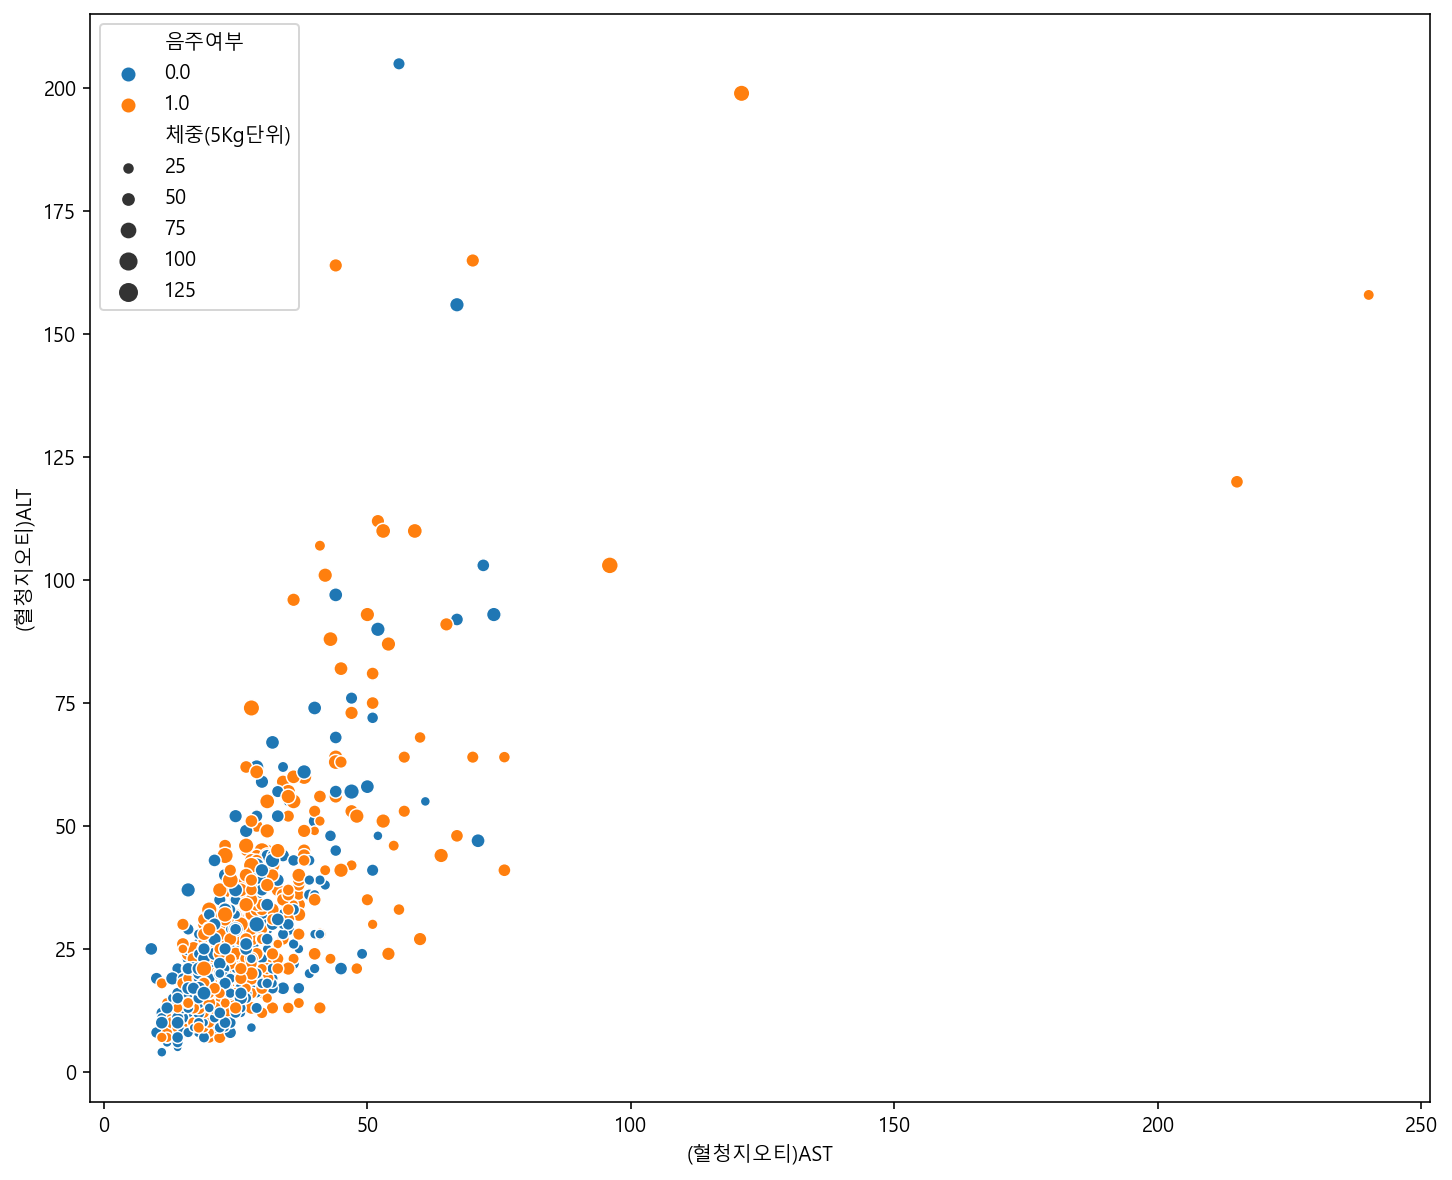

In [105]:
# 데이터의 값 크기에 따라 점의 크기를 다르게 표현

plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", size="체중(5Kg단위)")

## lmplot - 상관 관계를 보기

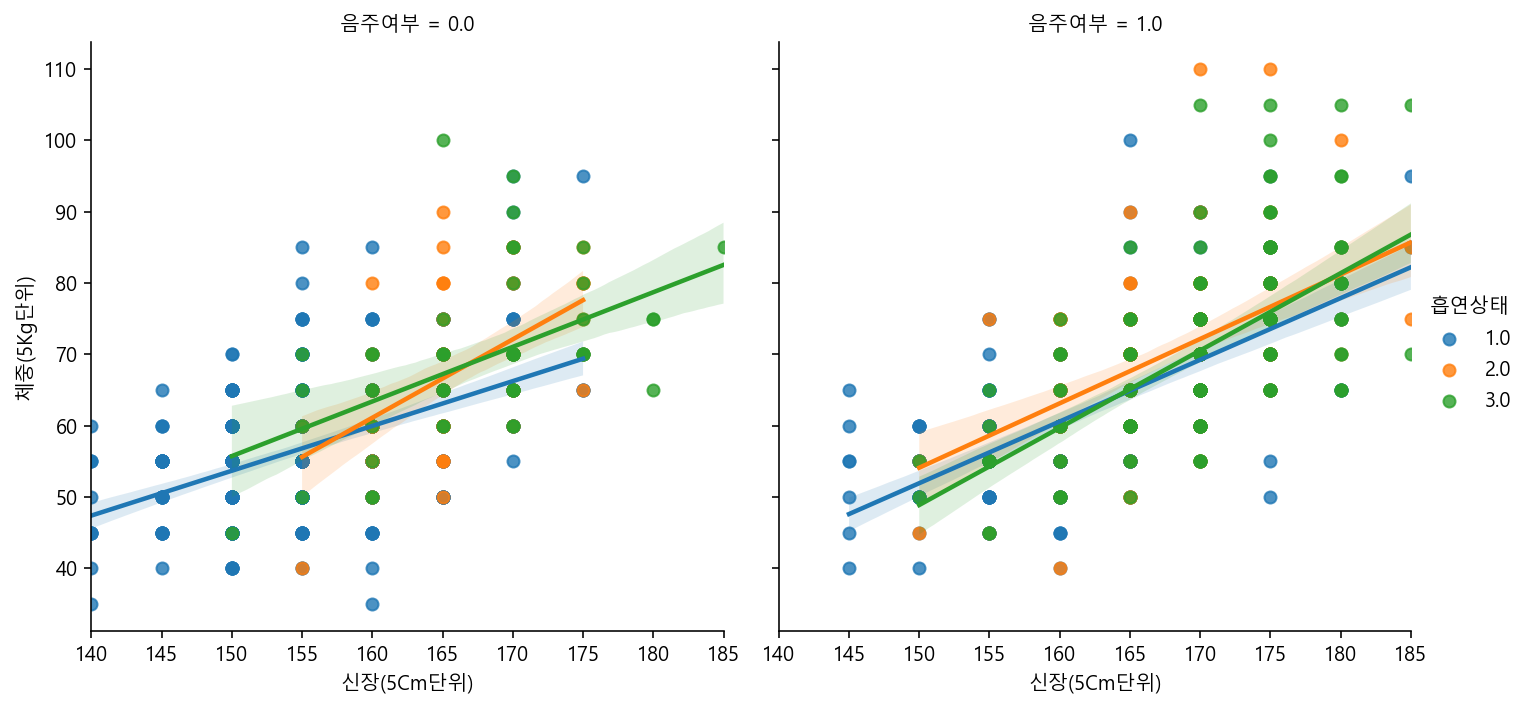

In [114]:
# scatterplot과 달리, 카테고리 변수에 따라서 여러 subplot을 그려볼 수 있다

sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="흡연상태", col="음주여부")

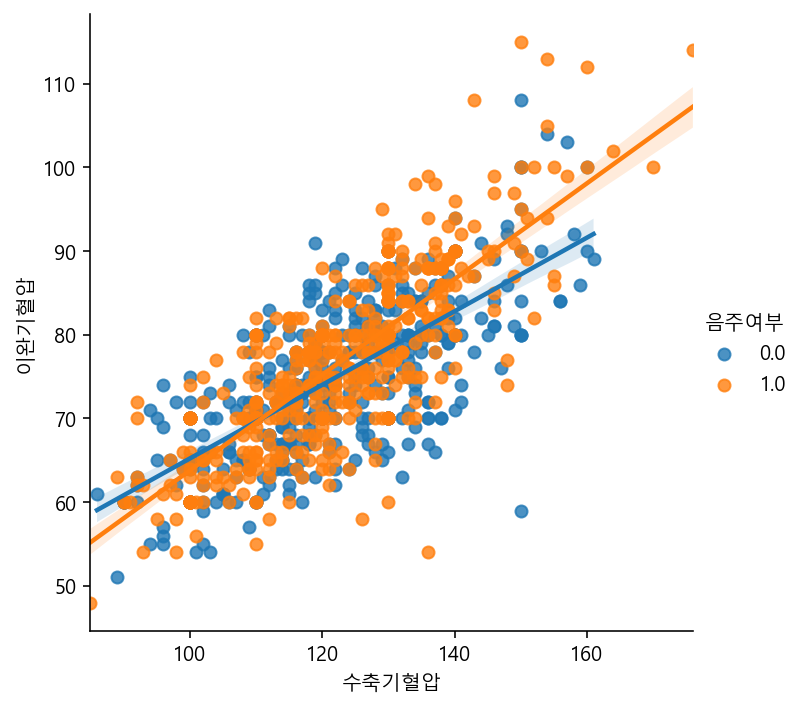

In [116]:
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="음주여부")

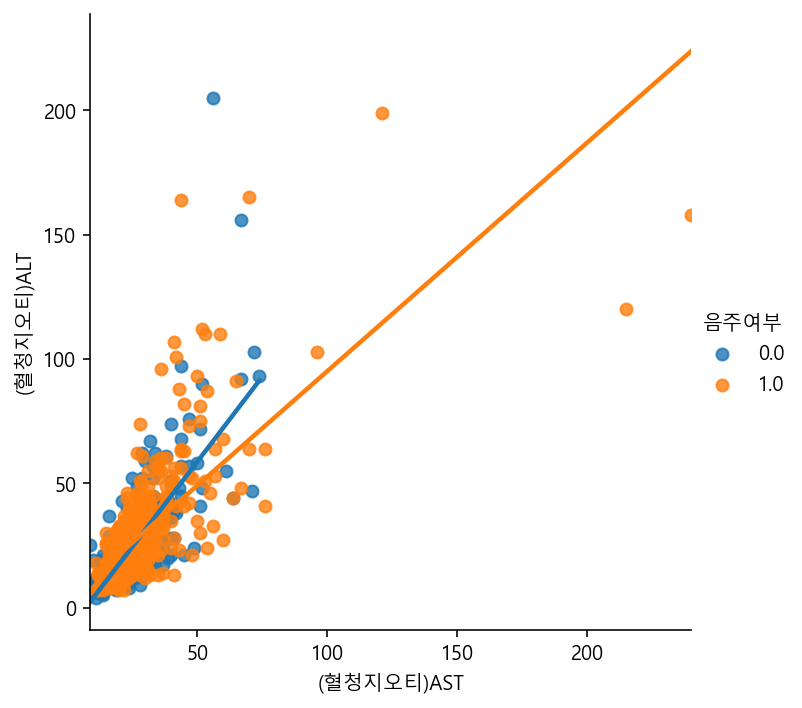

In [134]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=False)

## 이상치 다루기
* 이상치가 있으면 데이터가 자세히 보이지 않거나 회귀선이 달라질 수 있다
* 이상치를 제거해보고, 이상치만 따로 모아본다

In [135]:
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]

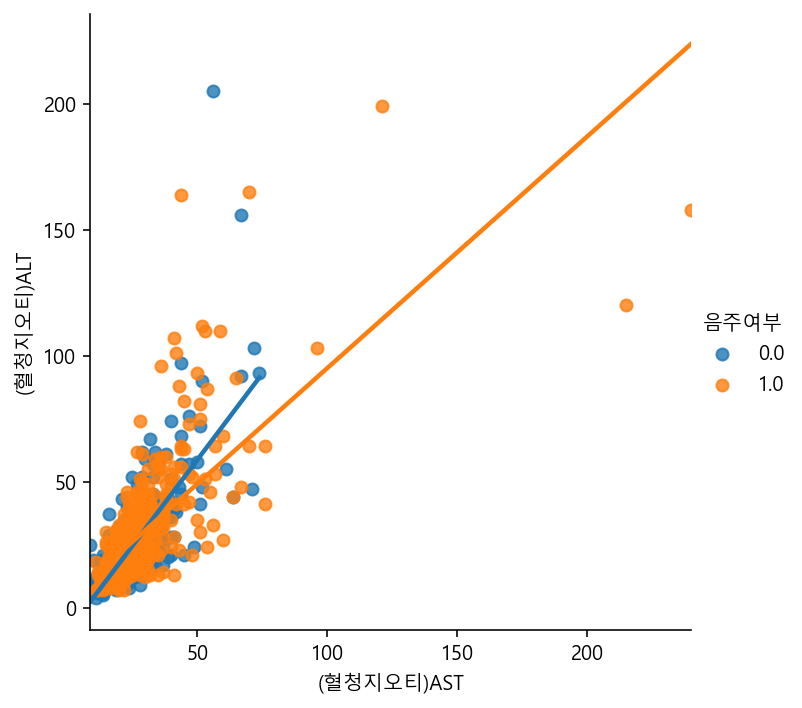

In [132]:
sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=False)

In [140]:
df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) | (df["(혈청지오티)ALT"] > 400)]
df_ASLT_high

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)   허리둘레  \
4754    2017     4755     1            9    41        170         55   74.0   
15820   2017    15821     2           13    45        150         55   83.0   
17830   2017    17831     2            8    41        150         50   64.6   
19949   2017    19950     1            6    41        170        105  103.0   
26464   2017    26465     1            7    41        175         70   82.0   
...      ...      ...   ...          ...   ...        ...        ...    ...   
982305  2017   982306     2           16    28        155         50   79.3   
990867  2017   990868     2           11    41        145         45   75.0   
991226  2017   991227     1            6    42        170         80   81.0   
992747  2017   992748     2           10    41        165         40   58.0   
995323  2017   995324     1            7    11        185        105  101.4   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
4754      1.0    0.7  ...  125.0   3.0   1.0         0      NaN    NaN   
15820     0.6    1.2  ...  999.0   1.0   1.0         0      NaN    NaN   
17830     1.2    1.2  ...  111.0   3.0   1.0         1      NaN    NaN   
19949     1.0    1.2  ...  133.0   1.0   0.0         0      NaN    NaN   
26464     1.2    1.2  ...  169.0   1.0   0.0         1      NaN    NaN   
...       ...    ...  ...    ...   ...   ...       ...      ...    ...   
982305    0.4    0.7  ...   71.0   1.0   0.0         0      NaN    NaN   
990867    0.9    1.2  ...  279.0   1.0   0.0         0      NaN    NaN   
991226    0.7    0.8  ...   49.0   3.0   1.0         0      NaN    NaN   
992747    0.9    0.7  ...  777.0   3.0   1.0         0      NaN    NaN   
995323    0.7    0.7  ...  174.0   3.0   1.0         0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
4754        NaN           NaN  NaN  20181126  
15820       NaN           NaN  NaN  20181126  
17830       NaN           NaN  1.0  20181126  
19949       NaN           NaN  NaN  20181126  
26464       NaN           NaN  1.0  20181126  
...         ...           ...  ...       ...  
982305      NaN           NaN  NaN  20181126  
990867      NaN           NaN  NaN  20181126  
991226      NaN           NaN  NaN  20181126  
992747      NaN           NaN  NaN  20181126  
995323      NaN           NaN  NaN  20181126  

[381 rows x 34 columns]

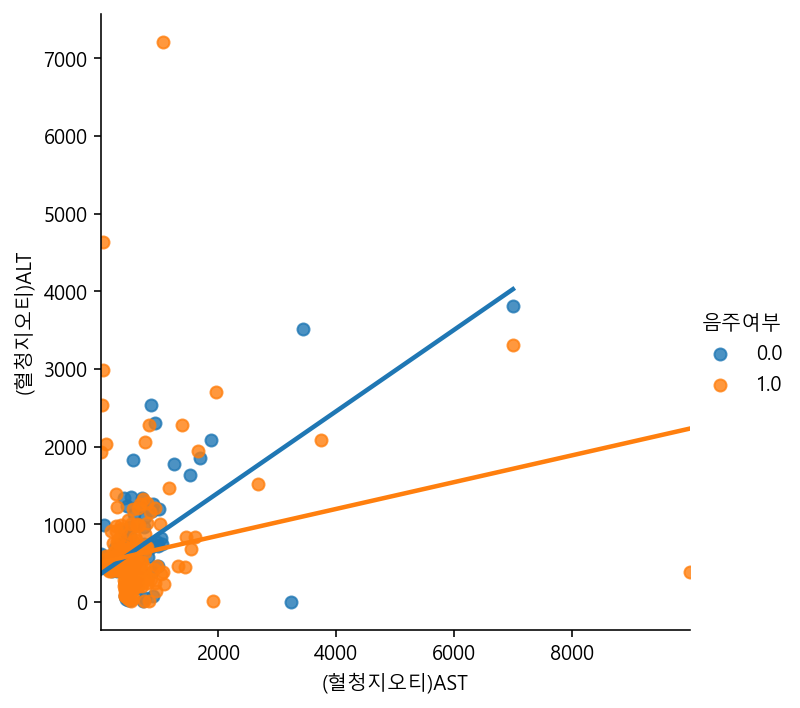

In [142]:
sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

## distplot
* 히스토그램
* 확률 밀도 함수
* series data type을 input

In [146]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [150]:
df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]

In [156]:
df_chol.describe()

count    999957.000000
mean        195.548251
std          38.718205
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: 총콜레스테롤, dtype: float64

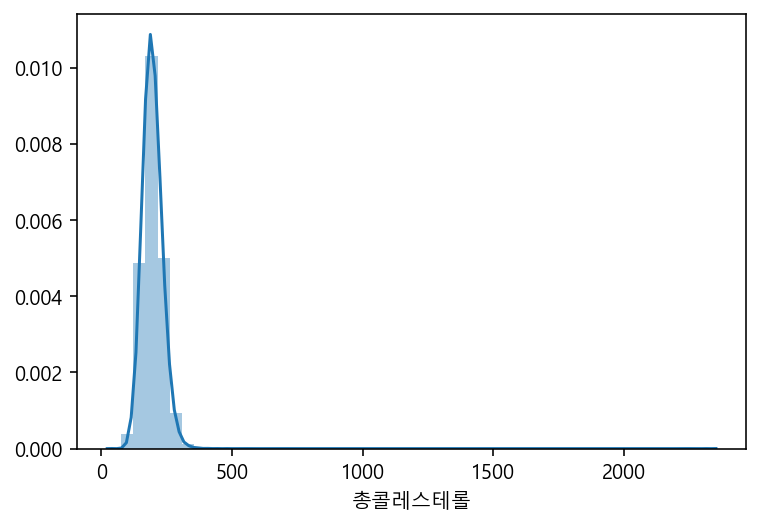

In [155]:
sns.distplot(df_chol, bins=50)

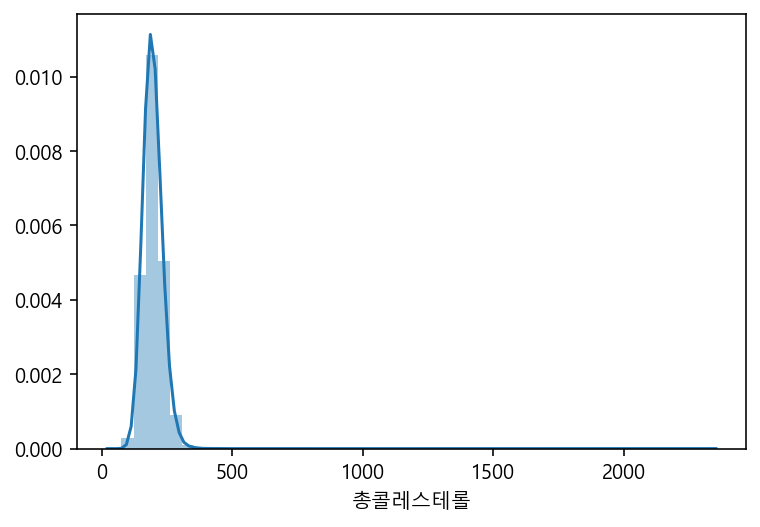

In [161]:
sns.distplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == 1),
    "총콜레스테롤"])

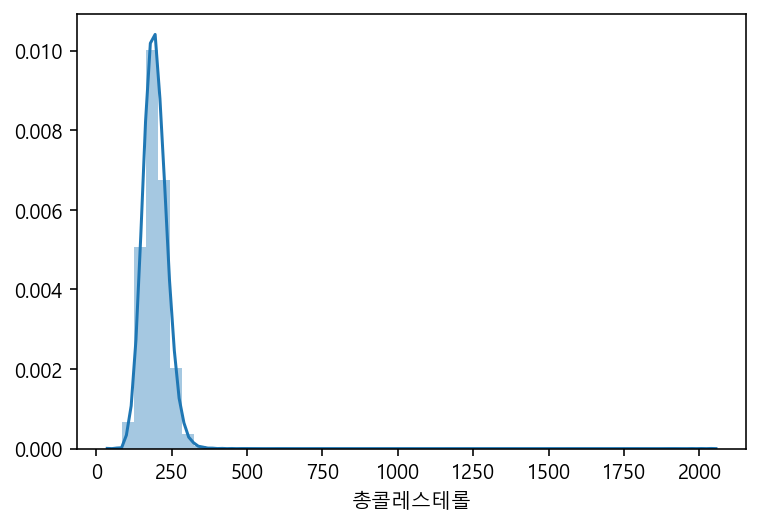

In [162]:
sns.distplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == 0),
    "총콜레스테롤"])

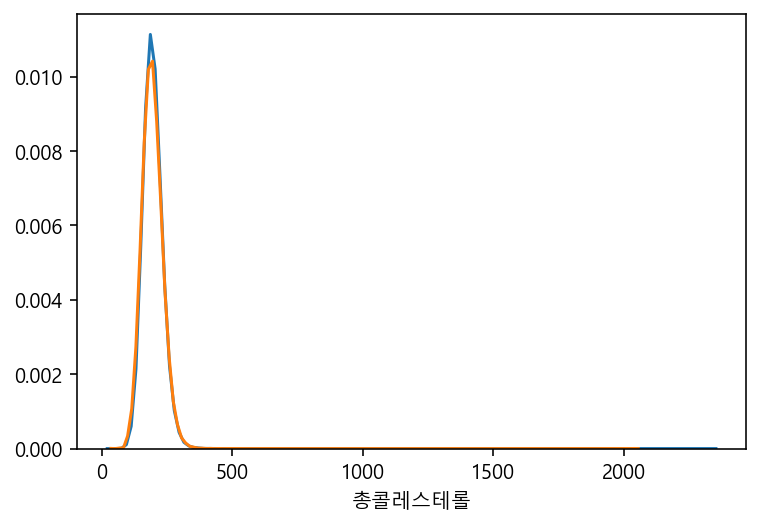

In [167]:
sns.distplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == 1),
    "총콜레스테롤"], hist=False)
sns.distplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == 0),
    "총콜레스테롤"], )

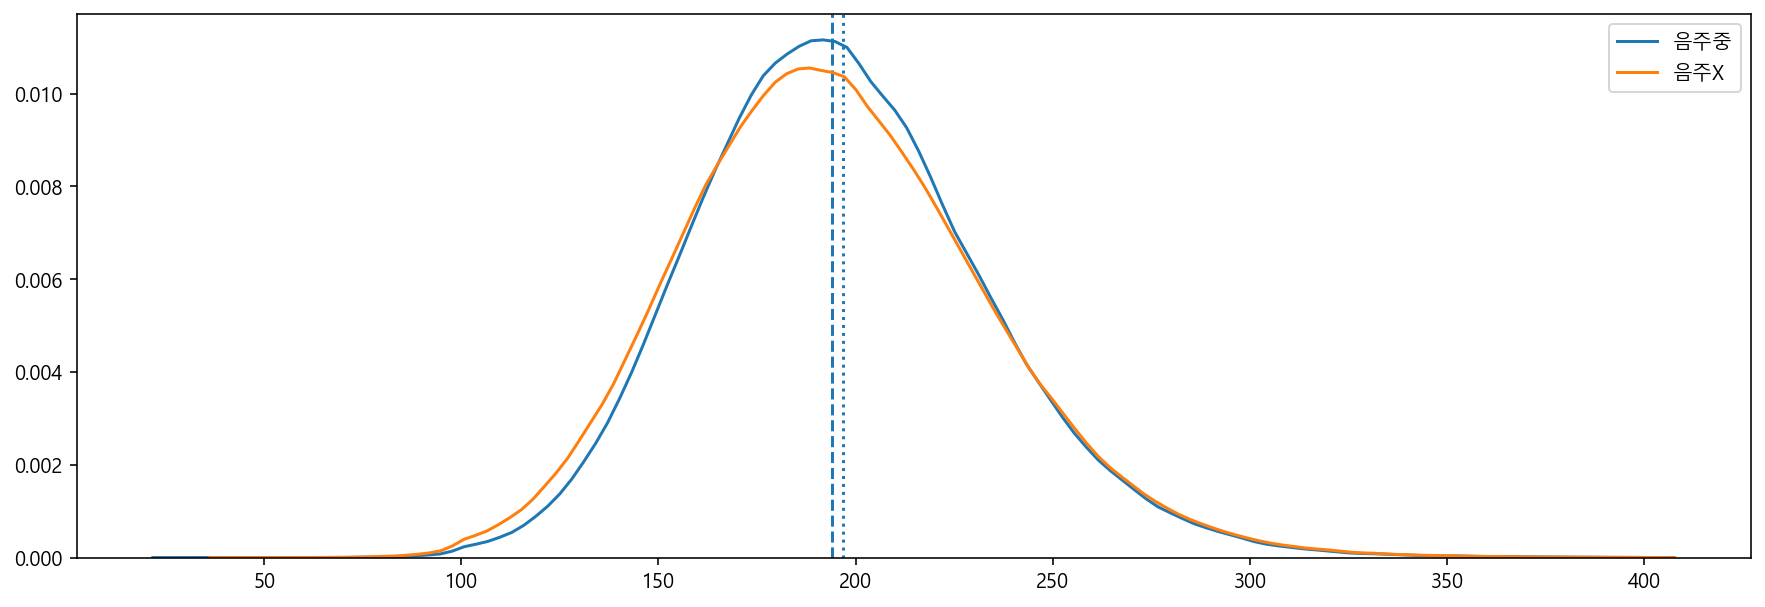

In [177]:
# plt.axvline() : add vertical line across the axe (수직선 추가)

plt.figure(figsize=(15,5))
plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle=":")
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == 1) & (df["총콜레스테롤"] < 400),
    "총콜레스테롤"], label="음주중")
sns.kdeplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == 0) & (df["총콜레스테롤"] < 400),
    "총콜레스테롤"], label="음주X")

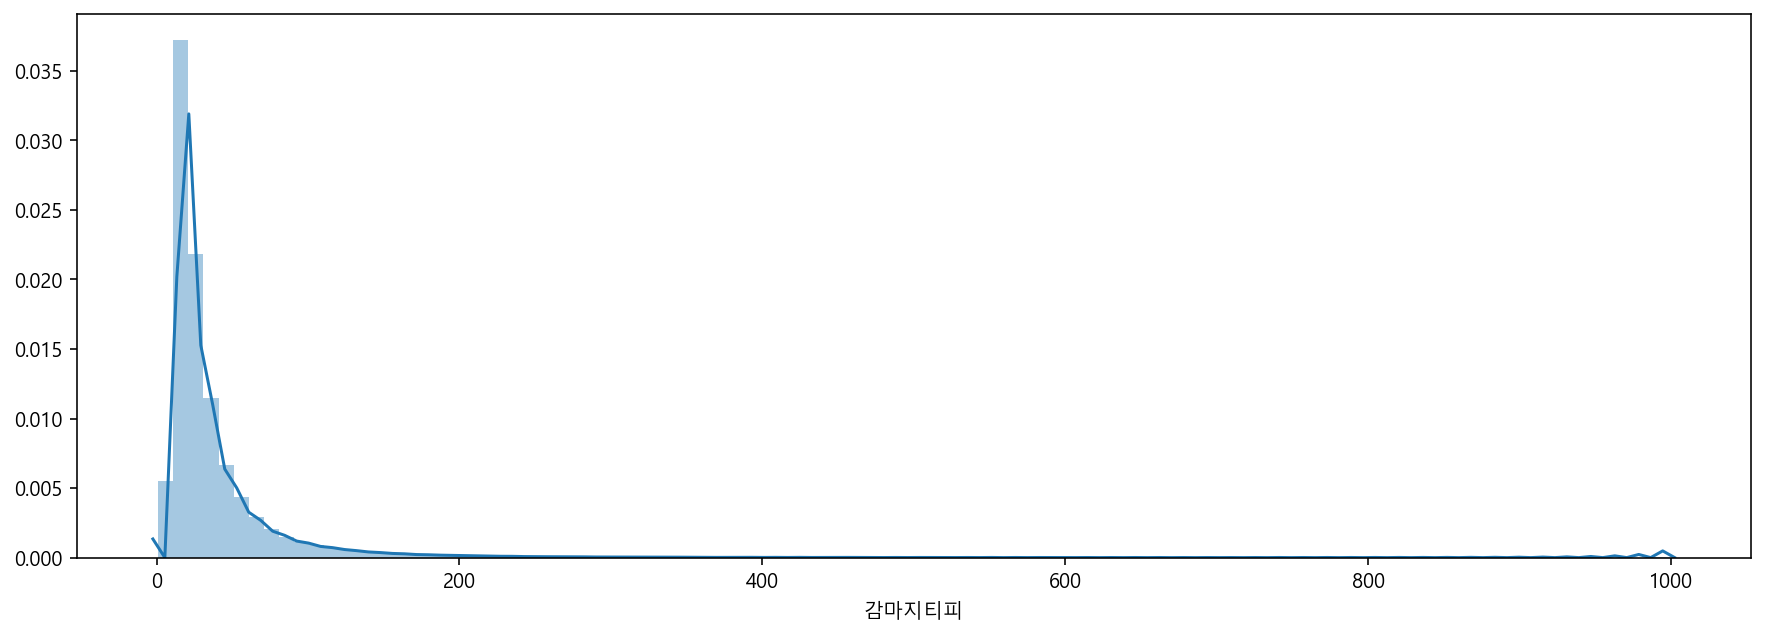

In [185]:
plt.figure(figsize=(15,5))
sns.distplot(df["감마지티피"], bins=100)

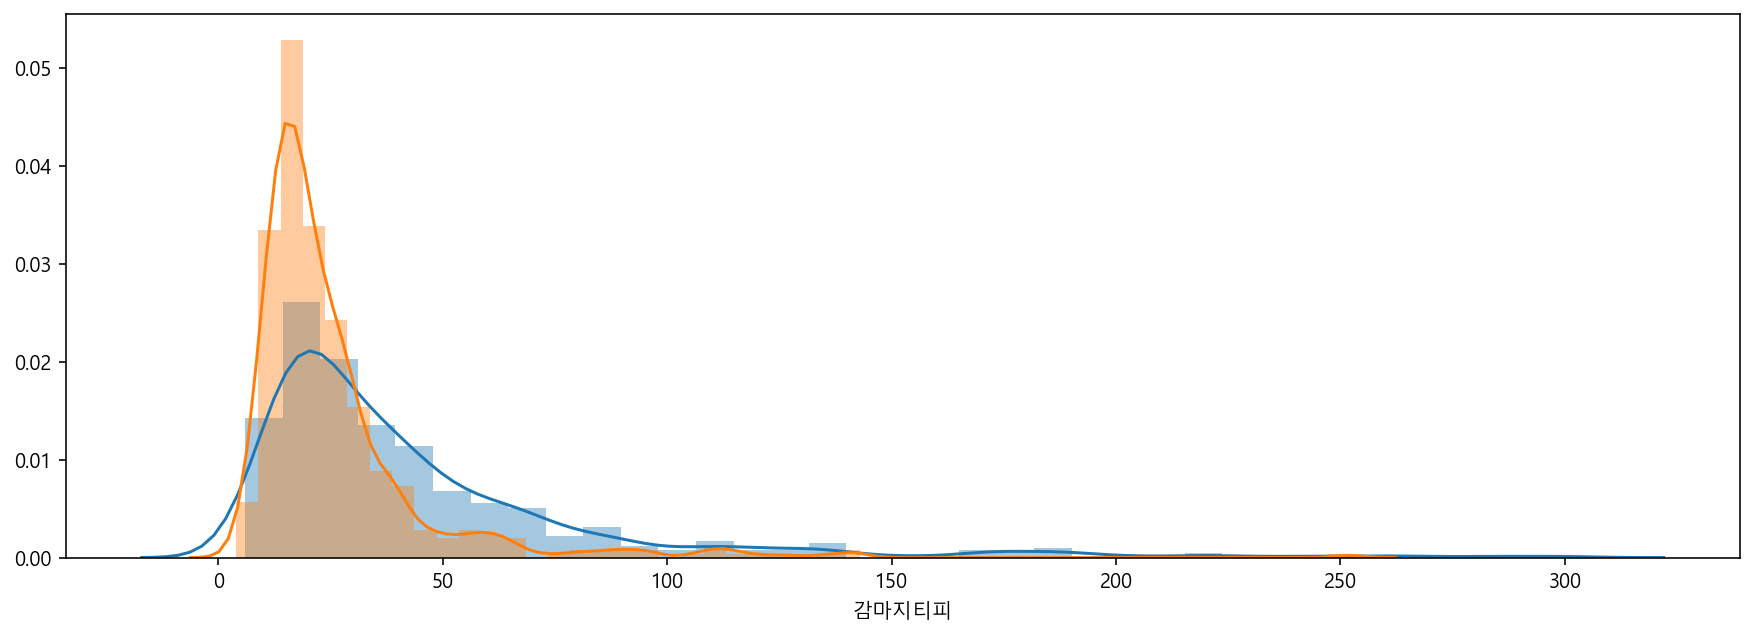

In [194]:
s_1 = df_sample.loc[(df_sample["음주여부"] == 1) & (df["감마지티피"] < 300), "감마지티피"]
s_0 = df_sample.loc[(df_sample["음주여부"] == 0) & (df["감마지티피"] < 300), "감마지티피"]

plt.figure(figsize=(15,5))
sns.distplot(s_1, label="음주 중")
sns.distplot(s_0, label="음주 중")

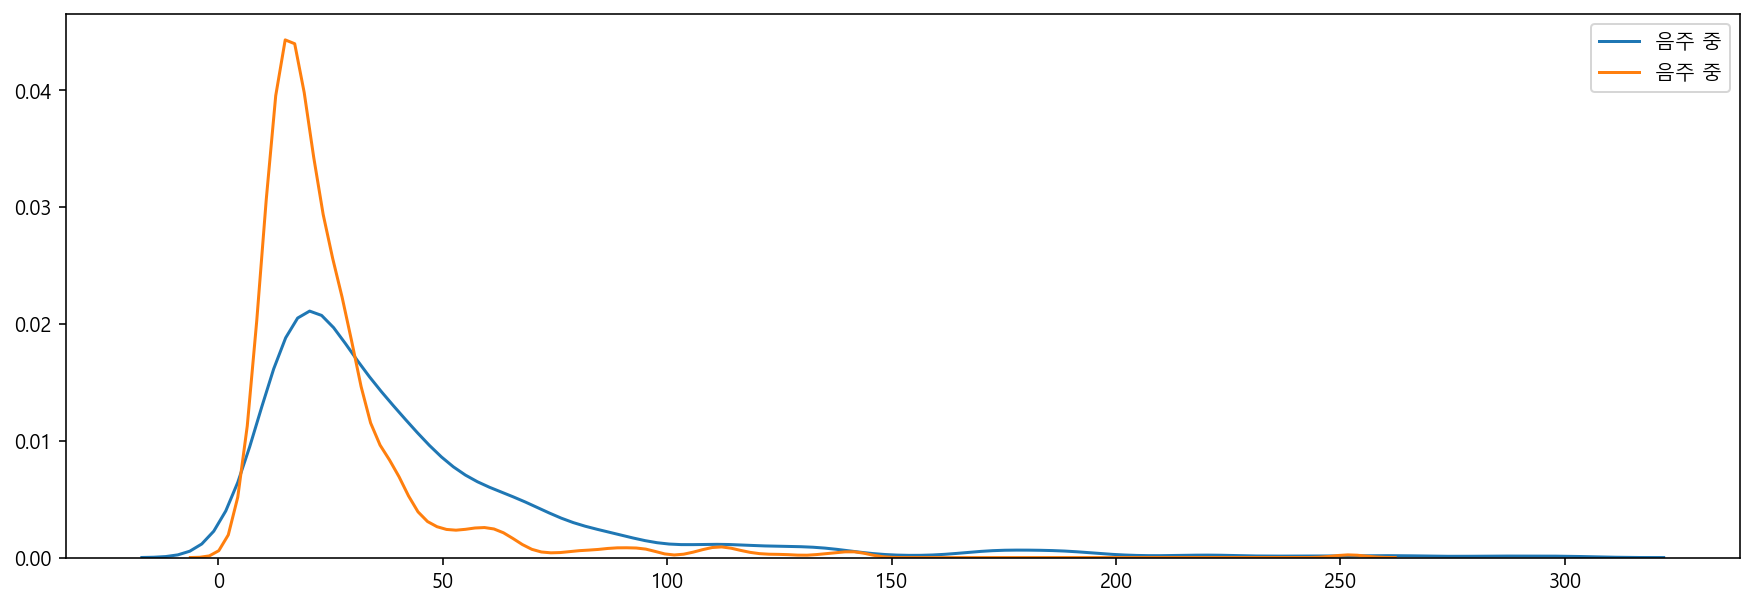

In [197]:
plt.figure(figsize=(15,5))
sns.kdeplot(s_1, label="음주 중")
sns.kdeplot(s_0, label="음주 중")

# 상관분석

## 상관계수 구하기

In [206]:
df_sample = df.sample(1000)
df_sample.shape

(1000, 34)

In [211]:
columns = df.columns.tolist()
columns

['기준년도',
 '가입자일련번호',
 '성별코드',
 '연령대코드(5세단위)',
 '시도코드',
 '신장(5Cm단위)',
 '체중(5Kg단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부',
 '구강검진수검여부',
 '치아우식증유무',
 '결손치유무',
 '치아마모증유무',
 '제3대구치(사랑니)이상',
 '치석',
 '데이터공개일자']

In [226]:
# df_small.corr() : 상관계수, method="pearson" (default), "kendall", "spearman"

df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

기준년도   가입자일련번호      성별코드  연령대코드(5세단위)      시도코드  신장(5Cm단위)  \
기준년도           NaN       NaN       NaN          NaN       NaN        NaN   
가입자일련번호        NaN  1.000000  0.090457     0.064787 -0.014706  -0.079456   
성별코드           NaN  0.090457  1.000000     0.088043 -0.044621  -0.726853   
연령대코드(5세단위)    NaN  0.064787  0.088043     1.000000  0.080444  -0.397700   
시도코드           NaN -0.014706 -0.044621     0.080444  1.000000  -0.047111   
신장(5Cm단위)      NaN -0.079456 -0.726853    -0.397700 -0.047111   1.000000   
체중(5Kg단위)      NaN -0.063899 -0.616578    -0.196316 -0.006591   0.697046   
허리둘레           NaN -0.027220 -0.491322     0.160681  0.037840   0.382547   
시력(좌)          NaN -0.005398 -0.088908    -0.023896  0.000595   0.059253   
시력(우)          NaN  0.023295 -0.100579    -0.082461  0.040201   0.118758   
청력(좌)          NaN -0.018201  0.005913     0.166611 -0.053152  -0.078242   
청력(우)          NaN -0.017520 -0.001899     0.128183 -0.072429  -0.070388   
수축기혈압          NaN  0.048980 -0.221842     0.294425  0.091986   0.060172   
이완기혈압          NaN  0.040046 -0.249269     0.137523  0.039276   0.129735   
식전혈당(공복혈당)     NaN  0.011417 -0.140575     0.173485  0.022098   0.036123   
총콜레스테롤         NaN  0.022319 -0.014573     0.013939  0.011510   0.004027   
트리글리세라이드       NaN -0.049463 -0.214328     0.040765  0.084056   0.149200   
HDL콜레스테롤       NaN  0.040976  0.291614    -0.070423 -0.045360  -0.191568   
LDL콜레스테롤       NaN  0.034201 -0.024510     0.005681 -0.012651   0.023376   
혈색소            NaN -0.048582 -0.688160    -0.182307  0.011845   0.561602   
요단백            NaN  0.032751 -0.052686     0.016713  0.053400   0.033360   
혈청크레아티닌        NaN -0.027479 -0.309671     0.064995 -0.019435   0.206047   
(혈청지오티)AST     NaN  0.054237 -0.185573     0.049238  0.054798   0.130342   
(혈청지오티)ALT     NaN -0.007625 -0.310665    -0.069400  0.058806   0.252536   
감마지티피          NaN  0.003058 -0.333696     0.011061  0.007702   0.247970   
흡연상태           NaN -0.079621 -0.606910    -0.092664  0.048146   0.458765   
음주여부           NaN -0.028391 -0.394064    -0.247589 -0.035026   0.355434   
구강검진수검여부       NaN  0.006200 -0.091662    -0.220024 -0.032748   0.129287   
치아우식증유무        NaN       NaN       NaN          NaN       NaN        NaN   
결손치유무          NaN       NaN       NaN          NaN       NaN        NaN   
치아마모증유무        NaN       NaN       NaN          NaN       NaN        NaN   
제3대구치(사랑니)이상   NaN       NaN       NaN          NaN       NaN        NaN   
치석             NaN -0.030715 -0.160355    -0.122183 -0.013686   0.162383   
데이터공개일자        NaN       NaN       NaN          NaN       NaN        NaN   

              체중(5Kg단위)      허리둘레     시력(좌)     시력(우)  ...     감마지티피  \
기준년도                NaN       NaN       NaN       NaN  ...       NaN   
가입자일련번호       -0.063899 -0.027220 -0.005398  0.023295  ...  0.003058   
성별코드          -0.616578 -0.491322 -0.088908 -0.100579  ... -0.333696   
연령대코드(5세단위)   -0.196316  0.160681 -0.023896 -0.082461  ...  0.011061   
시도코드          -0.006591  0.037840  0.000595  0.040201  ...  0.007702   
신장(5Cm단위)      0.697046  0.382547  0.059253  0.118758  ...  0.247970   
체중(5Kg단위)      1.000000  0.790992  0.057051  0.092078  ...  0.272787   
허리둘레           0.790992  1.000000  0.026821  0.022762  ...  0.255433   
시력(좌)          0.057051  0.026821  1.000000  0.329614  ...  0.036427   
시력(우)          0.092078  0.022762  0.329614  1.000000  ...  0.047283   
청력(좌)         -0.030471  0.054141  0.108148 -0.057262  ...  0.022123   
청력(우)         -0.031783  0.035572  0.059088  0.047108  ...  0.042908   
수축기혈압          0.281934  0.388383 -0.000848 -0.034068  ...  0.189334   
이완기혈압          0.316584  0.360199 -0.016057 -0.015534  ...  0.228941   
식전혈당(공복혈당)     0.153423  0.247128 -0.060877 -0.045662  ...  0.248047   
총콜레스테롤         0.101170  0.123256  0.038375 -0.038586  ...  0.132724   
트리글리세라이드       0.281039  0.302186  0.020792 -0.022506  ...  0.355664   
HDL콜레스테롤      -0.303802 -0.319288 -0.028794 -0.026732  ..

In [227]:
df_corr["신장(5Cm단위)"].sort_values(ascending=False)

신장(5Cm단위)       1.000000
체중(5Kg단위)       0.697046
혈색소             0.561602
흡연상태            0.458765
허리둘레            0.382547
음주여부            0.355434
(혈청지오티)ALT      0.252536
감마지티피           0.247970
혈청크레아티닌         0.206047
치석              0.162383
트리글리세라이드        0.149200
(혈청지오티)AST      0.130342
이완기혈압           0.129735
구강검진수검여부        0.129287
시력(우)           0.118758
수축기혈압           0.060172
시력(좌)           0.059253
식전혈당(공복혈당)      0.036123
요단백             0.033360
LDL콜레스테롤        0.023376
총콜레스테롤          0.004027
시도코드           -0.047111
청력(우)          -0.070388
청력(좌)          -0.078242
가입자일련번호        -0.079456
HDL콜레스테롤       -0.191568
연령대코드(5세단위)    -0.397700
성별코드           -0.726853
기준년도                 NaN
치아우식증유무              NaN
결손치유무                NaN
치아마모증유무              NaN
제3대구치(사랑니)이상         NaN
데이터공개일자              NaN
Name: 신장(5Cm단위), dtype: float64

In [229]:
df_corr.loc[df_corr["음주여부"] > 0.25, "음주여부"].sort_values()

감마지티피        0.270602
체중(5Kg단위)    0.293878
흡연상태         0.325606
혈색소          0.331271
신장(5Cm단위)    0.355434
음주여부         1.000000
Name: 음주여부, dtype: float64

In [233]:
df_corr["혈색소"].sort_values(ascending=False).head(10)

혈색소           1.000000
신장(5Cm단위)     0.561602
체중(5Kg단위)     0.524093
흡연상태          0.458186
허리둘레          0.413535
(혈청지오티)ALT    0.352322
음주여부          0.331271
이완기혈압         0.316644
감마지티피         0.301250
트리글리세라이드      0.250266
Name: 혈색소, dtype: float64

In [234]:
df_corr["감마지티피"].sort_values(ascending=False).head(10)

감마지티피         1.000000
(혈청지오티)AST    0.521521
(혈청지오티)ALT    0.506720
트리글리세라이드      0.355664
흡연상태          0.302770
혈색소           0.301250
체중(5Kg단위)     0.272787
음주여부          0.270602
허리둘레          0.255433
식전혈당(공복혈당)    0.248047
Name: 감마지티피, dtype: float64

## heatmap

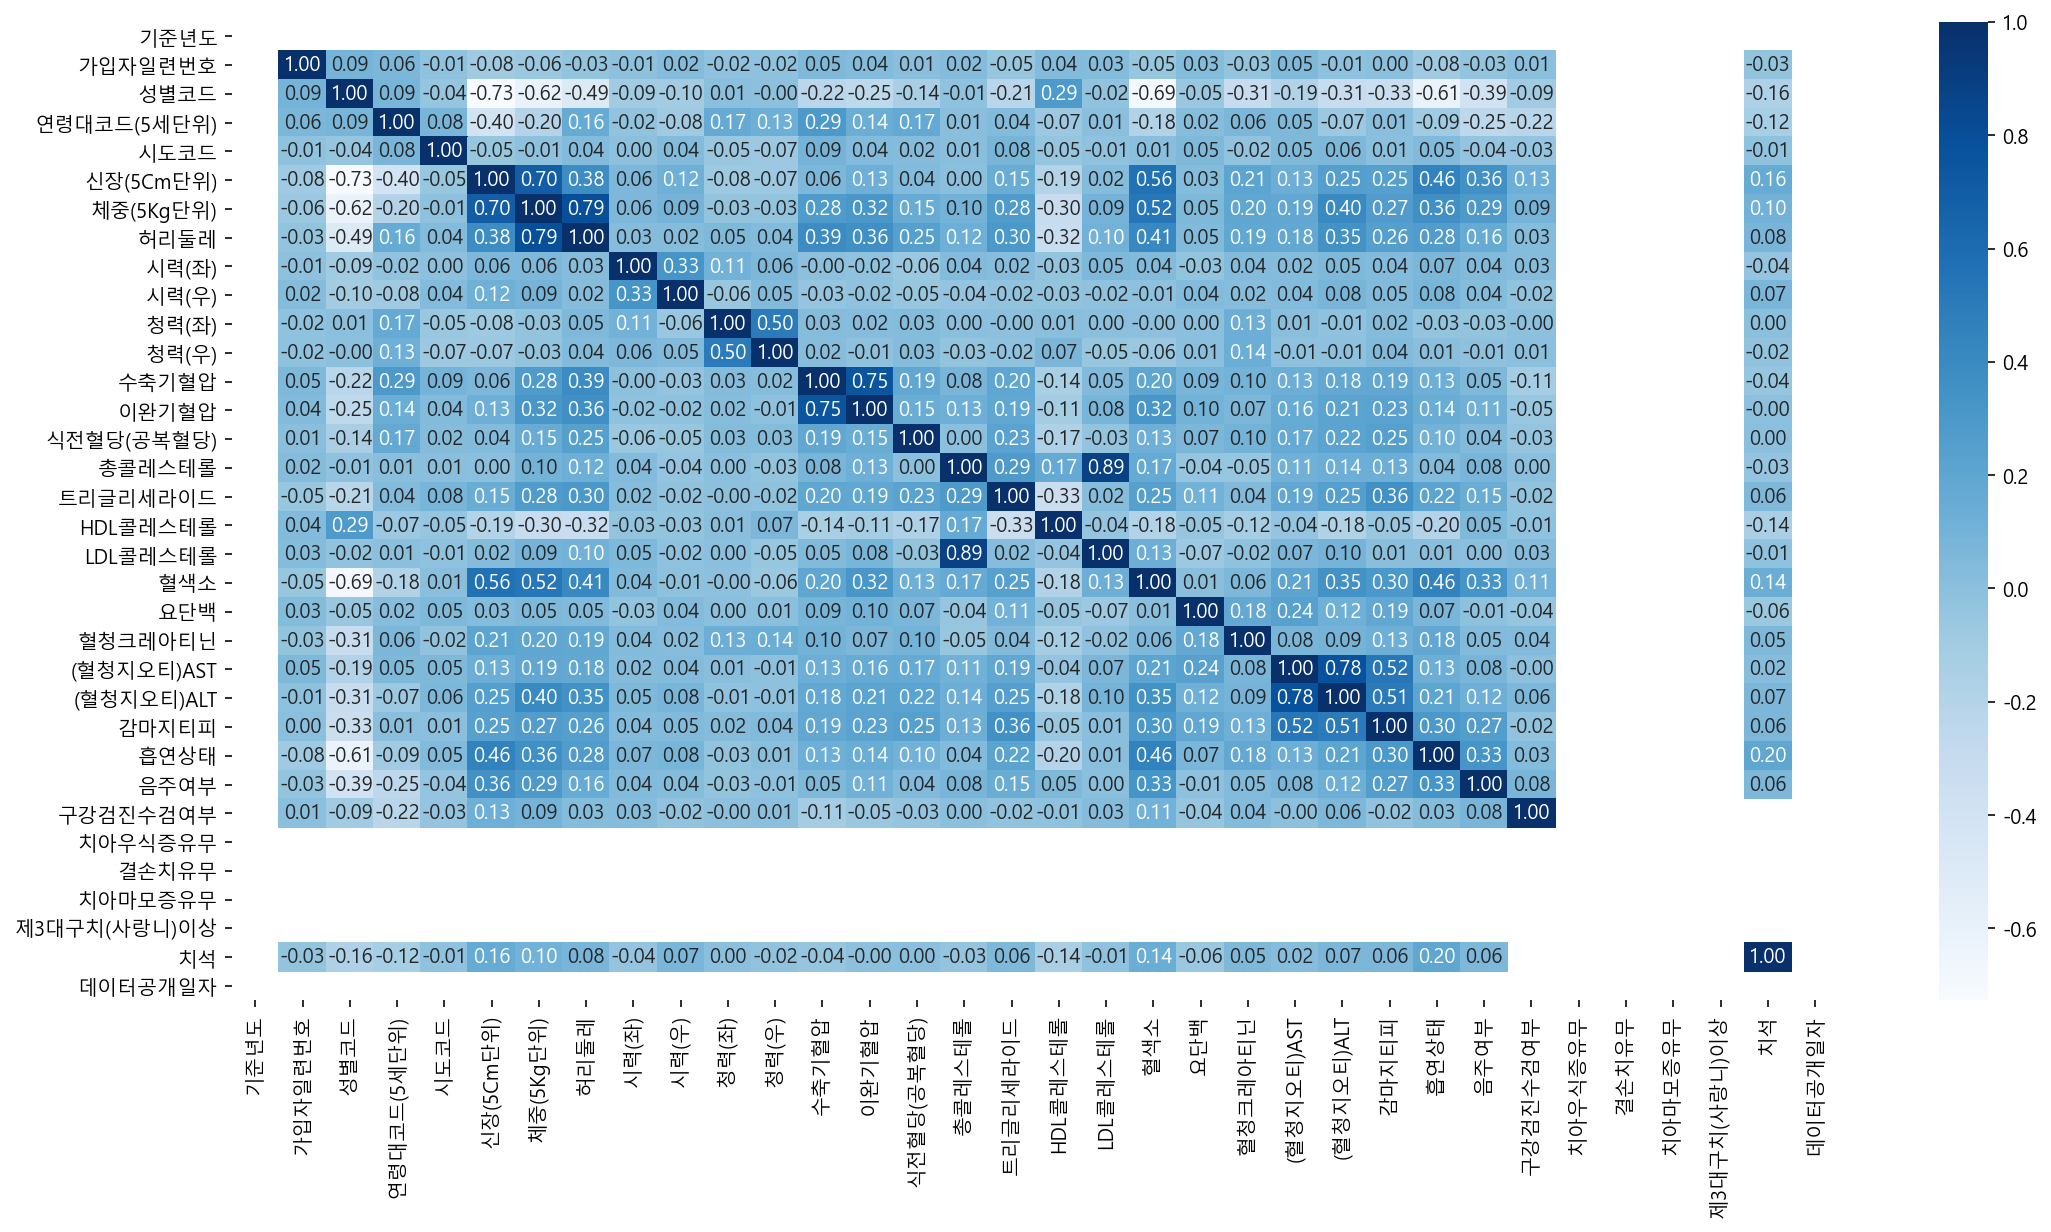

In [241]:
# annot=True : annotation, 각 셀에 상관계수 값을 표시
# fmt=".2f" : string formatting, 2 floating point
# cmap : colormap

plt.figure(figsize=(18,9))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

In [2]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
plt.figure(figsize=(18, 9))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

NameError: name 'df_corr' is not defined